<a id="top"></a>
### **Supplement to _Characterising spatial structure in climate model ensembles_**

This notebook replicates the figures and analysis presented in _Characterising spatial structure in climate model ensembles_ (Chandler et al., 2023), also including a simple analysis of an unstructured ensemble that is not included in the paper.

[EPP analysis of an unstructured ensemble, illustrated using the UKCP18 regional PPE](#unstructured-ensemble)
- [Figure 1: Change in frequency of wet days in UKCP18 ensemble members between 1980-2010 and 2050-2079](#figure-1)
- [Figure 2: Simple EPP analysis for an ensemble with no structure](#figure-2)

[EPP analysis of an unbalanced structured ensemble, illustrated using the EuroCORDEX regional MME](#structured-ensemble)
- [(i) Estimate the GCM and RCM effects](#fitted-model2)
- [(ii) Calculate the residual matrix](#model2-residuals)
- [(iii) Calculate the ranges of variation for the observed ensemble](#ranges-of-variation)
- [(iv) Estimated partitioning of uncertainty](#estimated-anova)
  - [Figure 3: Estimated partitioning of uncertainty](#figure-3)
  - [Visualisation of range of variance explained within observed ensemble](#plot-range-of-varexp)
- [(v) Calculate the EPPs of the fitted effects and, if appropriate, of the residuals](#gcm-epps)
  - [Figures 4 & 5: Estimated decomposition of variation in the EuroCORDEX ensemble](#figure-4&5)


In [1]:
# all modules & methods are provided in the epp_manova script
from epp_manova import *

<a id="unstructured-ensemble"></a>

---
### **Analysis of an unstructured ensemble**

The analysis in this section is not included in the published paper. It illustrates the application of Ensemble Principal Patterns to simulated changes in summer (JJA) wet-day frequencies over the United Kingdom over the period 2050-2079, under the RCP8.5 emissions scenario and compared with a reference period of 1981-2010. 

The simulations are from a 12-member perturbed physics ensemble produced as part of the <a href="https://www.metoffice.gov.uk/research/approach/collaboration/ukcp/about/index">2018 UK national climate projections</a>, using the HadREM3-GA7-05 Regional Climate Model with boundary conditions from the HadGEM3-GC3.05 Earth System Model. Ensemble member 1 is produced using the standard versions of both models; the remaining members use different perturbations of the model physics, with the same perturbations applied to the two models (i.e. the RCM and ESM) used for each run. The spatial resolution of the outputs is approximately 12km $\times$ 12km. 

With this unstructured ensemble, if the ensemble members are regarded as coming from different models then the analysis is equivalent to an inter-model EOF. 

<a id="figure-A"></a>
#### **Figure A: change in frequency of wet days in UKCP18 ensemble members between 1980-2010 and 2050-2079** [^](#top)

In the figure below, the numbering of the ensemble members is not consecutive: this numbering is the same that is used in the ensemble metadata.

Text(0.5, 1.0, 'Figure A: changes in percentage of wet summer days in the UKCP18 ensemble members between 1981-2010 and 2050-2079')

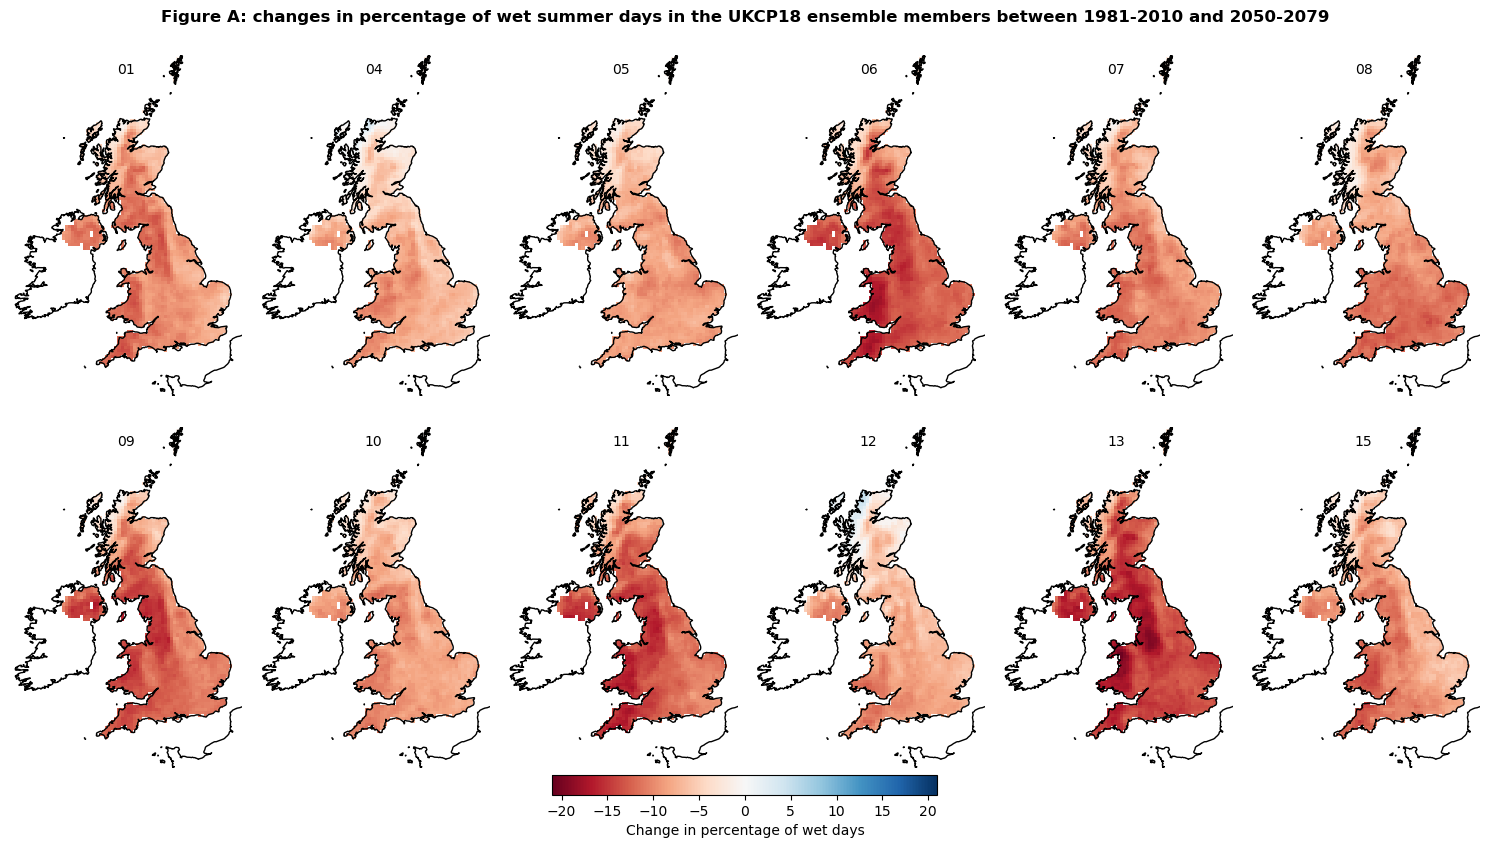

In [2]:
# load data
fwd = xr.open_dataset("fwd_JJA_2050-2079_ukcp18-12km.nc").fwd

# create array of subplots using OSGB projection, adjust spacing
fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize = (15,8), sharex = True, sharey = True, dpi= 100, 
                        facecolor='w', edgecolor='k', subplot_kw = {"projection" : crs_osgb})
fig.tight_layout()
plt.subplots_adjust(hspace = 0)

# get extent of values for colourbar
vlim = np.ceil(max([np.abs(x) for x in [fwd.min(), fwd.max()]]))

# plot each ensemble member on separate axes
for i in range(12):
    
    ax = fig.axes[i]
    cbar = fwd.isel(run = i).plot(ax = ax, cmap = "RdBu", vmin = -vlim, vmax = vlim, add_colorbar = False)       # draw map
    
    ax.set_title(fwd.run.values[i], fontsize = "medium", y = 0.92)                                               # add title manually to customise height
    
    ax.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs = crs_osgb)                                                     # fix plot extent to reduce whitespace
    ax.set_axis_off()                                                                                            # remove box around plot
    ax.coastlines()                                                                                              # draw coastlines
     
# add shared colourbar
plt.colorbar(cbar, ax = axs, location = "bottom", fraction = 0.025, pad = 0.01, label = "Change in percentage of wet days")

plt.suptitle("Figure A: changes in percentage of wet summer days in the UKCP18 ensemble members between 1981-2010 and 2050-2079", 
             y = 1.0, fontweight = "bold")

**_Comments on Figure A:_**

* All ensemble members project reductions in the frequency of wet summer days; 
* The magnitude of these reductions varies between members; 
* There is a pronounced 'western marine influence' pattern (strongly enhanced reductions on west-facing slopes of upland regions in western UK) in those members with the largest reductions. 

<a id="figure-B"></a>
#### **Figure B: simple EPP analysis for an ensemble with no hierarchical structure** [^](#top)

When there is no structure in the ensemble, EPPs can be computed on the centred $n\times S$  data matrix $\widetilde{\textbf{Y}} = \textbf{Y} - \overline{\textbf{Y}}$.

Text(0.5, 1.1, 'Figure B: EPP (inter-model EOF) analysis of the UKCP18 ensemble')

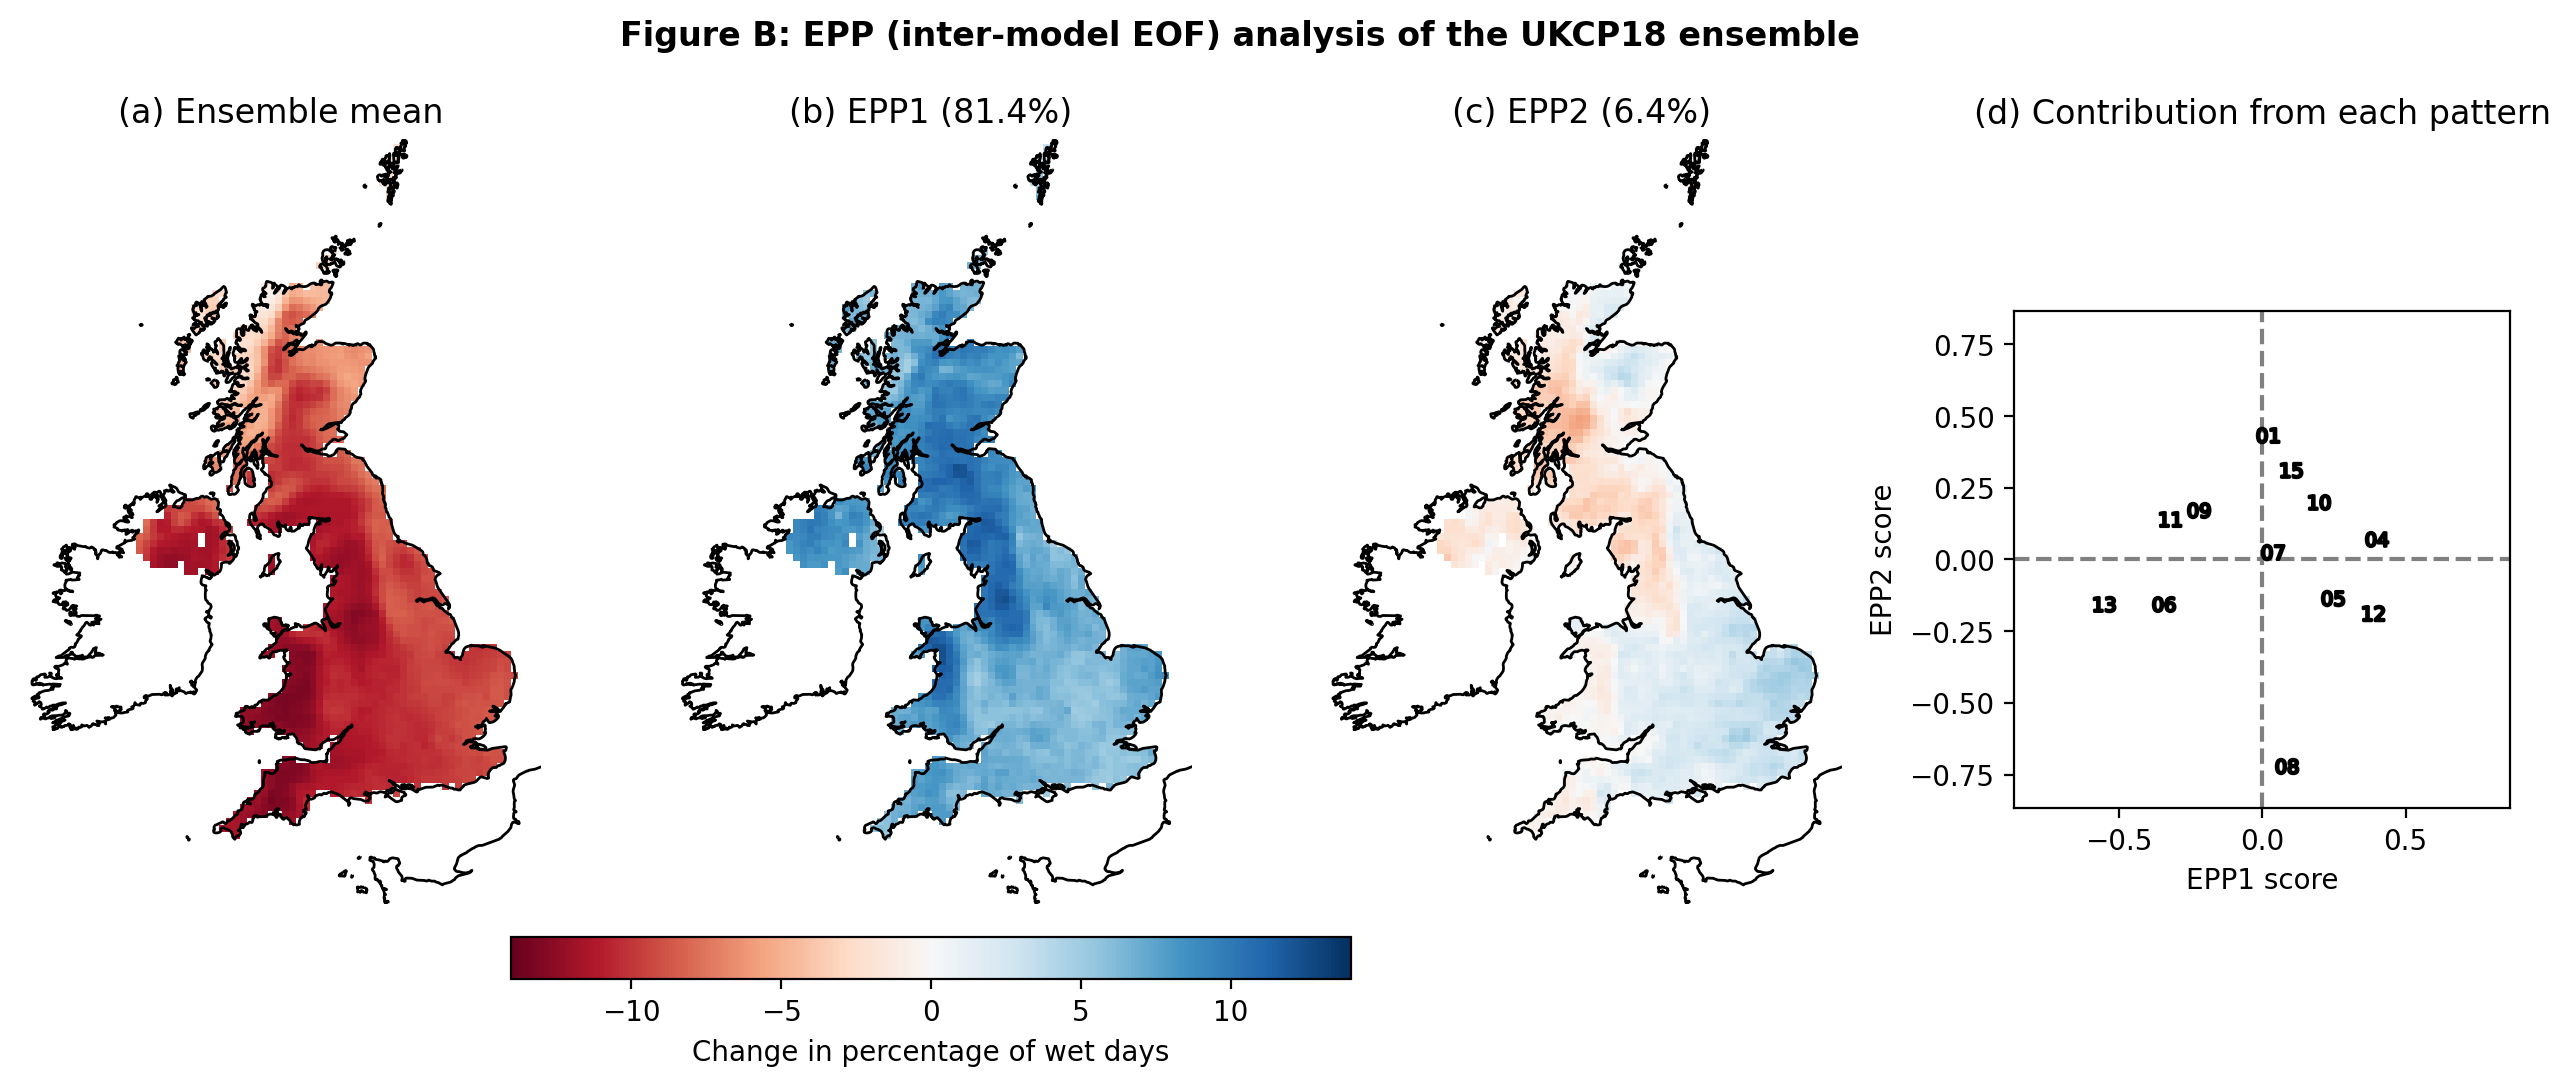

In [3]:
# load data
Y = xr.open_dataset("fwd_JJA_2050-2079_ukcp18-12km.nc").fwd

# centre the data by subtracting the ensemble mean at each location; flatten map array to vector
Ybar = Y.mean("run", skipna = False)
Y_tilde = (Y - Ybar).stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values

# compute EPPs on the centred data and plot
ukcp_epps = EPPs(Y_tilde, Ybar)

EPP_plot(*ukcp_epps.values(),cmap = "RdBu", markers = "$"+Y.run.values+"$", 
         cbar_label = "Change in percentage of wet days")

plt.suptitle("Figure B: EPP (inter-model EOF) analysis of the UKCP18 ensemble", y = 1.1, fontweight = "bold")

**_Comments on Figure B:_**
    
* The ensemble mean (panel (a)) shows the features noted in Figure A.
* From panel (b), 81% of the overall variation about the ensemble mean is attributable to the first ensemble principal pattern which picks out the marine influence pattern noted in the commentary on Figure A. 
* Because EPP1 accounts for a relatively high proportion of the overall variation, the individual maps in Figure A can be reconstructed to a high degree of accuracy by adding appropriate multiples of EPP1 to the ensemble mean: the required multiples are the corresponding EPP scores, plotted on the horizontal axis of panel (d). If a user wanted to select just two of these ensemble members, in such a way as to capture the range of spatial structures in the projected changes, then one possible strategy would be to pick those members with the highest and lowest scores - which are the members labelled 13 (with a score of −0.6) and either 4 or 12 (both with scores of 0.35).
* Although EPP1 accounts for 81% of the ensemble variation, it is also instructive to examine the second EPP (panel (c)). It accounts for just 6% of the ensemble variation and, with the exception of ensemble member 8, has small scores for almost all members (panel (d)). This suggests that the parameter perturbation for ensemble member 8 has a small but unique 'signature' in the ensemble output: inspection of the EPP2 map, coupled with the negative score for this member, shows that this signature corresponds to smaller reductions in summer wet-day frequencies on the westward-facing slopes of uplands in Scotland, Wales and England. Notice also that the highest score for this EPP is achieved by the 'unperturbed' ensemble member 1. These results could help to understand the effects of the corresponding parameter perturbations for these ensemble members. 

<a id="figure-C"></a>
#### **Figure C: EPPs 3 and 4 for UKCP18 ensemble** [^](#top)

Text(0.5, 1.1, 'Figure C: EPPs 3 and 4 for UKCP18 ensemble')

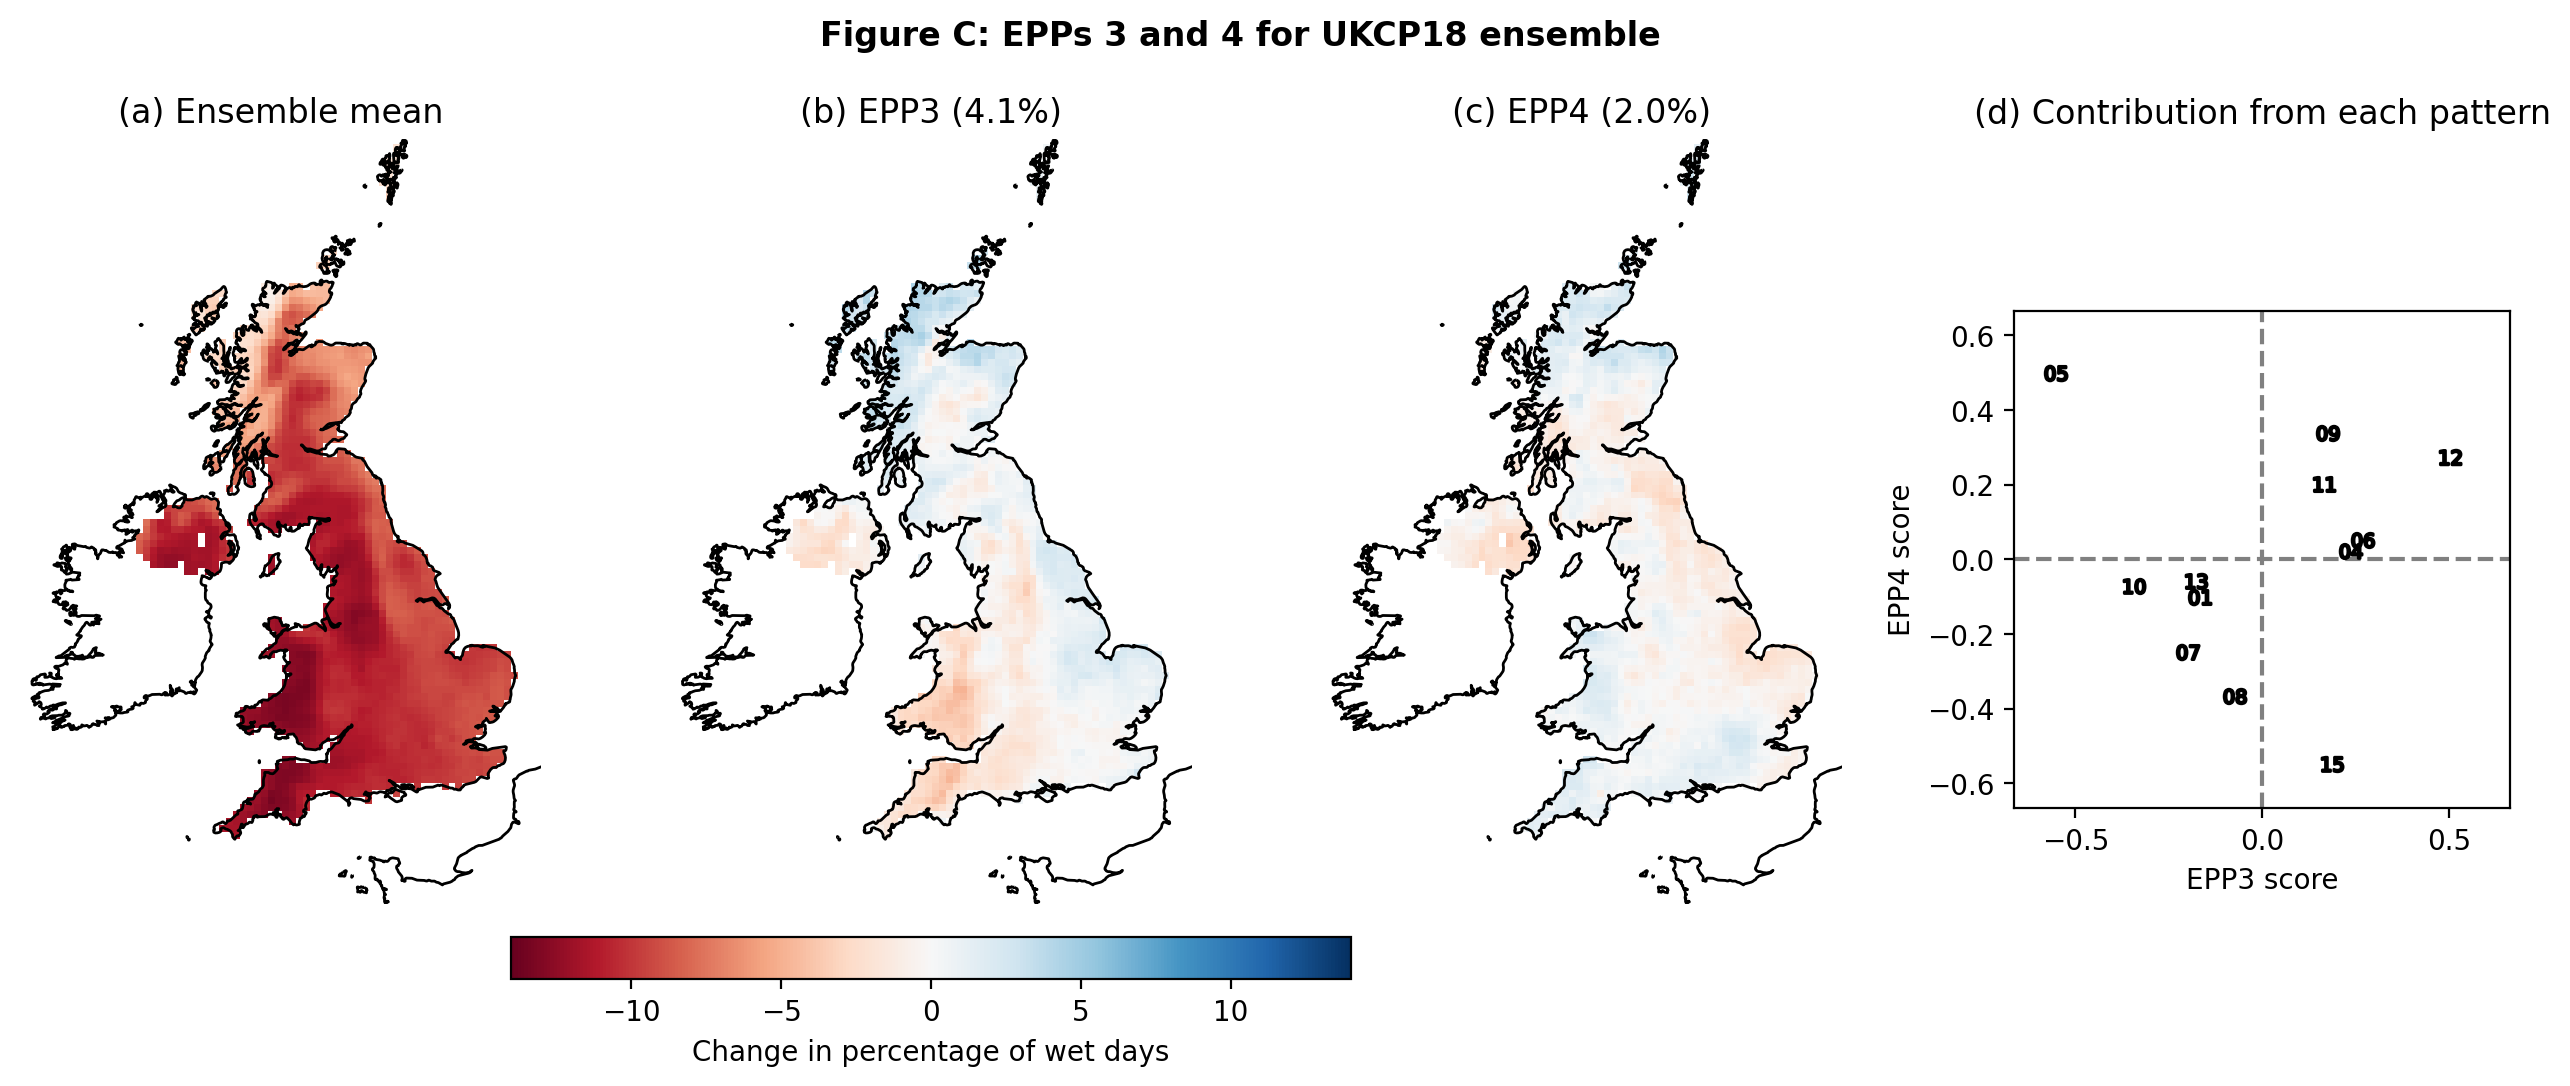

In [4]:
# EPPs 3 and 4
EPP_plot(*ukcp_epps.values(), which=[3,4],cmap = "RdBu", markers = "$"+Y.run.values+"$", 
         cbar_label = "Change in percentage of wet days")

plt.suptitle("Figure C: EPPs 3 and 4 for UKCP18 ensemble", y = 1.1, fontweight = "bold")

**_Comments on Figure C:_**
    
* Neither of these EPPs accounts for much variation
* There's a possibility that EPP3 could be considered as an altitude effect: ensemble members with high scores have more drying at high altitudes than those with low scores (this doesn't quite work for Scotland though, maybe because much of the effect has already been taken into EPP2). 
* Similarly, EPP4 may be interpretable in terms of rain shadow. This could be a bit speculative though, particularly given that it only represents 2% of the variation. 
* Ensemble member 5 is a bit of an outlier in both EPPs. It would potentially be interesting to examine the perturbations used to generate this member. 

<a id="structured-ensemble"></a>

---
### **Analysis of an unbalanced structured ensemble** [^](#top)

<a id="Figure-1"></a>
#### **Figure 1: Bias in JJA surface temperature in EuroCORDEX ensemble members, 1989-2008** [^](#top)

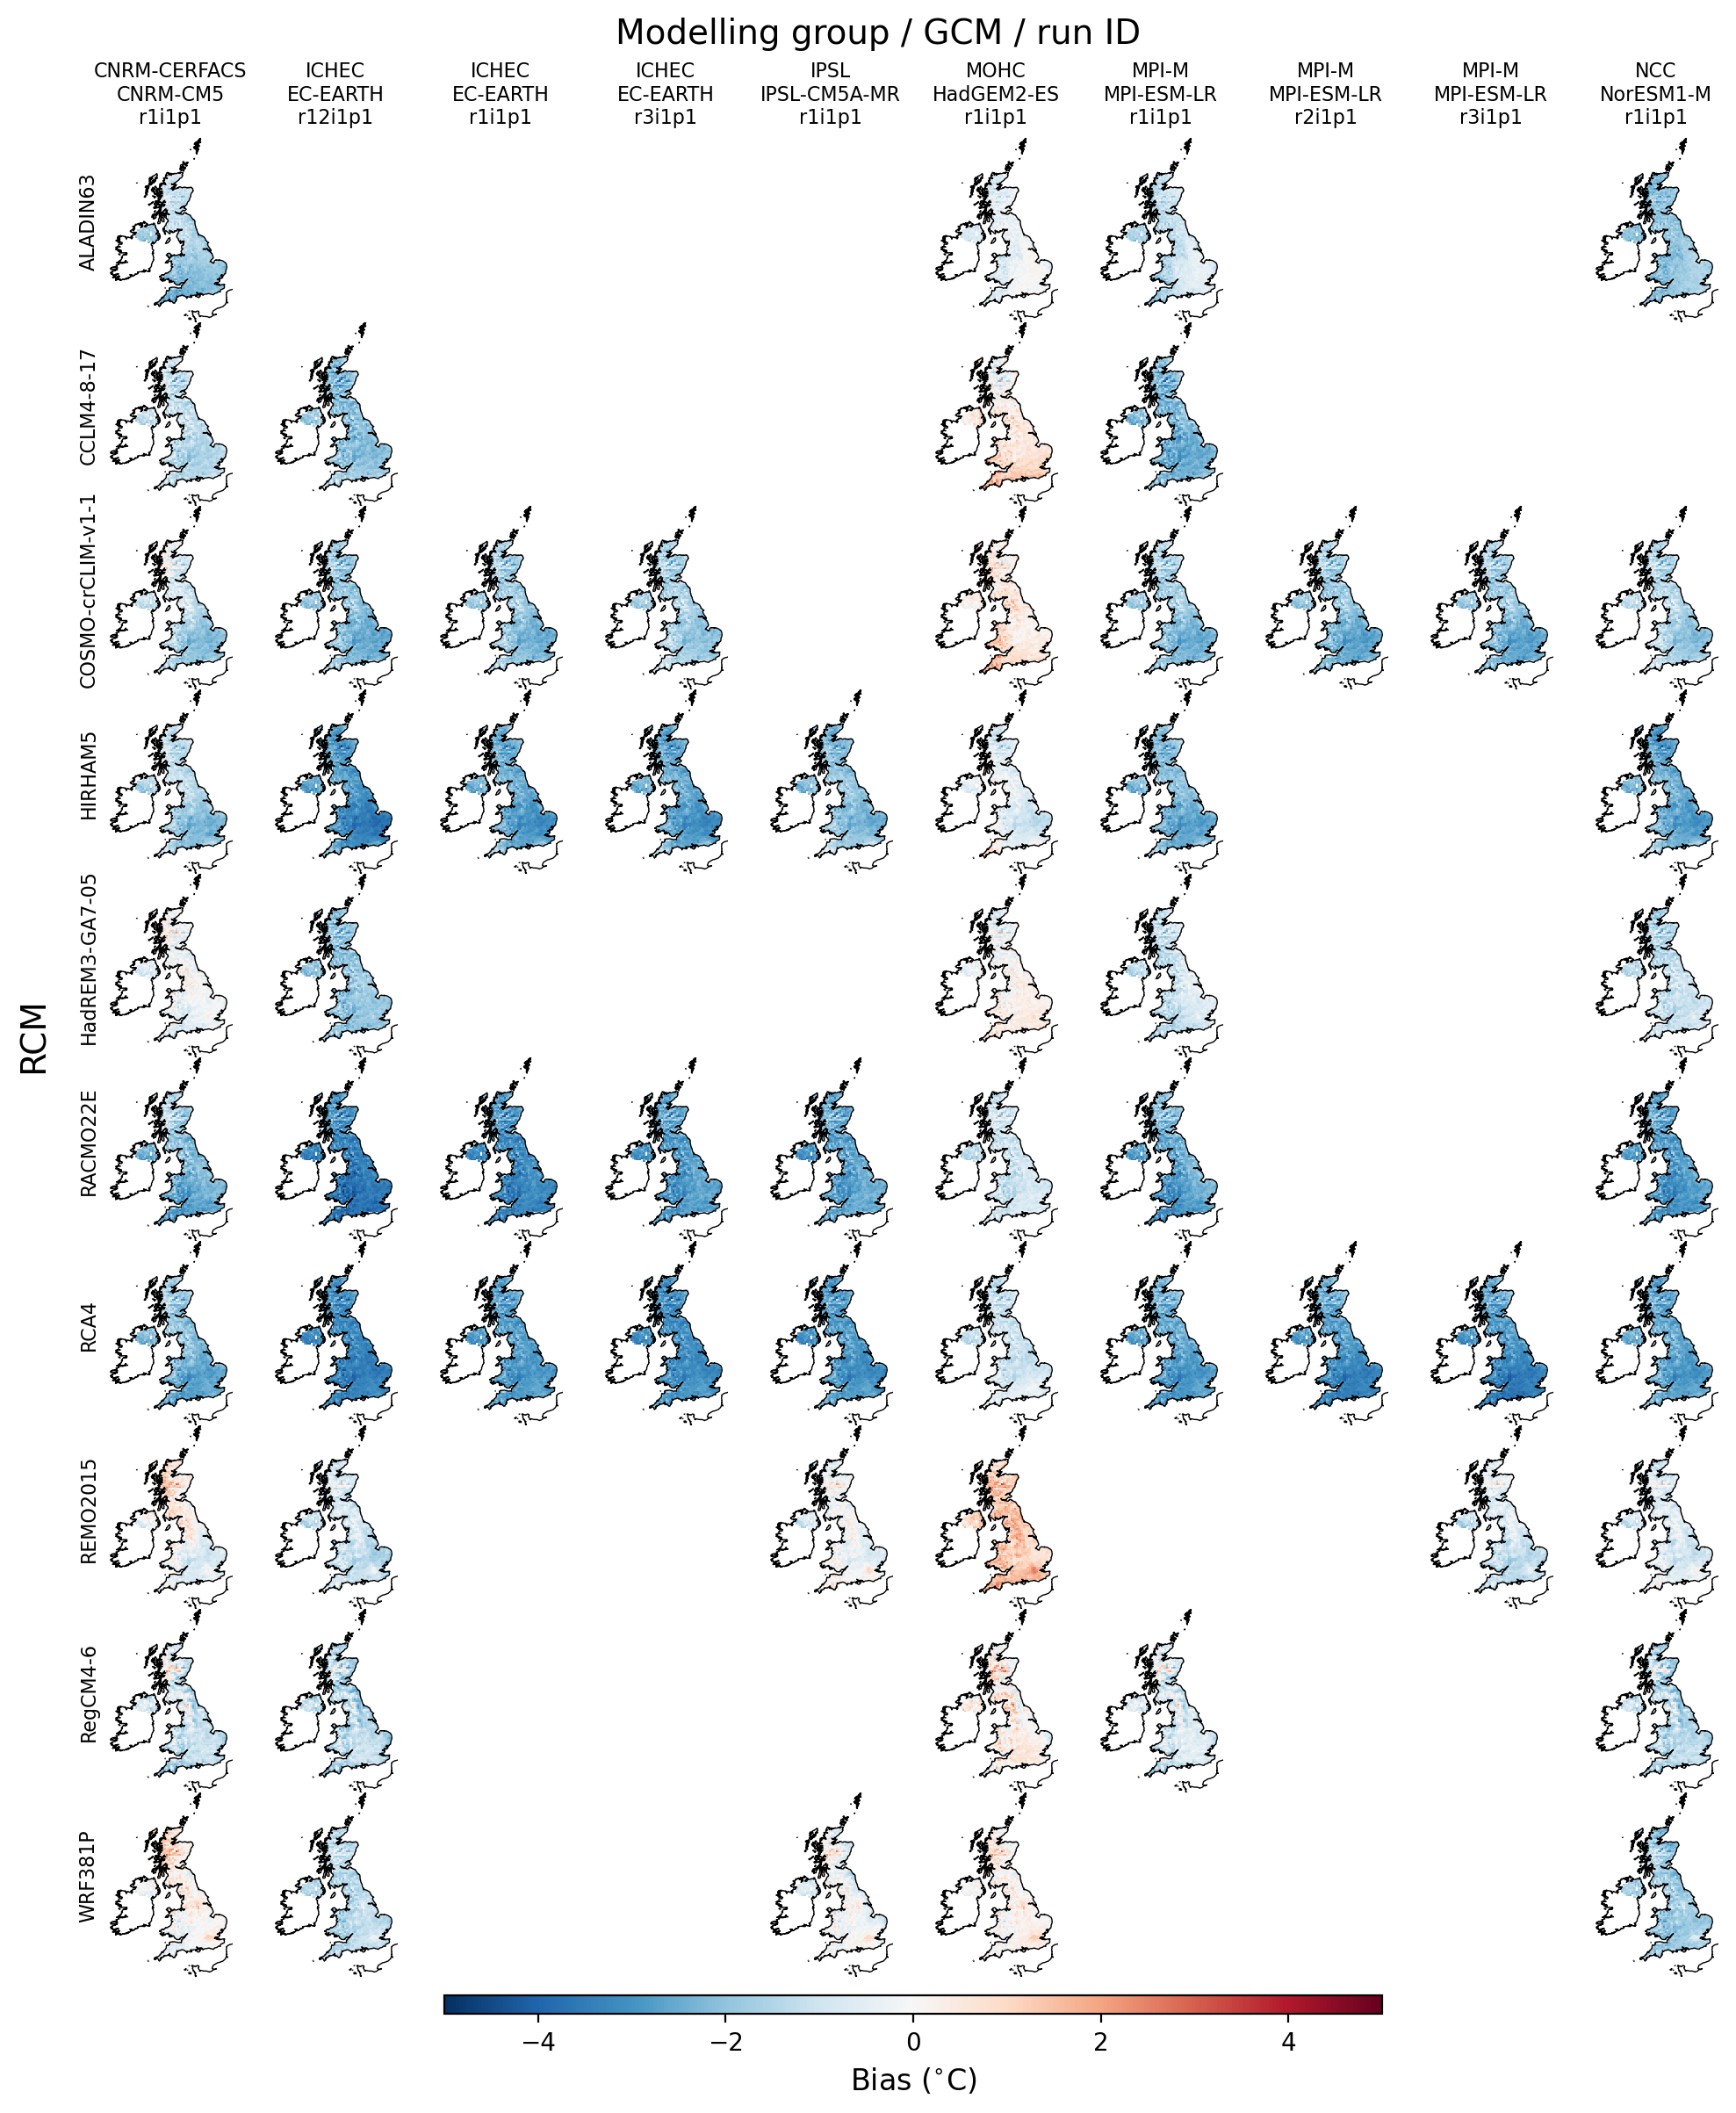

In [5]:
# Load the data
da = xr.open_dataset("tasmax_JJA_1989-2008_EuroCORDEX.nc").tasmax

# flatten DataArray and remove all NA values
Y = da.stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values

# get ensemble mean & standard deviation
Ybar = da.mean("run", skipna = False)
ens_sd = da.std("run", skipna = False)

# identify GCM and RCM used for each run
run_names = da.run.values
run_gcm = da.run.str.replace("p1_.+","p1").values
run_rcm = da.run.str.replace(".+_","").values
ShortRunNames = [re.sub("^CNRM-CERFACS-|^ICHEC-|^IPSL-|^MOHC-|^MPI-M-|^NCC-", "", ini) for ini in run_names]
# get G and R, counts of unique GCMs and RCMs
gcms = sorted(set(run_gcm))
rcms = sorted(set(run_rcm))
ShortGCMNames = [re.sub("^CNRM-CERFACS-|^ICHEC-|^IPSL-|^MOHC-|^MPI-M-|^NCC-", "", ini) for ini in gcms]

n = len(run_names)
G = len(gcms)
R = len(rcms)

fig, axs = plt.subplots(ncols = 10, nrows = 10, figsize = (10,12), sharex = True, sharey = True, dpi= 200, 
                        facecolor='w', edgecolor='k', subplot_kw = {"projection" : crs_osgb})
fig.tight_layout()
fig.subplots_adjust(hspace = 0, wspace = 0, top = 0.94, left = 0.05, right = 0.99, bottom = 0.05)

# set up axes
for axz in fig.axes:
    axz.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs=crs_osgb)
    axz.tick_params(axis="both", labelsize=21)
    axz.set_axis_off()

# get extent of values for colourbar
vlim = np.ceil(max([np.abs(x) for x in [da.min(), da.max()]]))

# plot the maps
for i in range(n):
    rcmID = rcms.index(run_rcm[i])
    gcmID = gcms.index(run_gcm[i])
    ax = axs[rcmID,gcmID]
    cbar = da.isel(run = i).plot(ax = ax, cmap = "RdBu_r",
                                 vmin = -vlim, vmax = vlim, add_colorbar = False)       # draw map
    ax.set_title("") # suppress title
    ax.coastlines(linewidth=0.5) # draw coastlines

# Model IDs 
for i in range(G): 
    GCMLab = re.sub("^CNRM-CERFACS-", "CNRM-CERFACS\n", gcms[i]) # Replacements lack elegance, but life is short!
    GCMLab = re.sub("^ICHEC-", "ICHEC\n", GCMLab)
    GCMLab = re.sub("^IPSL-", "IPSL\n", GCMLab)
    GCMLab = re.sub("^MOHC-", "MOHC\n", GCMLab)
    GCMLab = re.sub("^MPI-M-", "MPI-M\n", GCMLab)
    GCMLab = re.sub("^NCC-", "NCC\n", GCMLab)
    GCMLab = GCMLab.replace("_", "\n")
    axs[0,i].set_title(GCMLab, fontsize=8)
for i in range(R): axs[i,0].text(-0.07, 0.55, rcms[i], va='bottom', ha='center', 
                                 rotation='vertical', rotation_mode='anchor', 
                                 transform = axs[i,0].transAxes, fontsize = 8)

# Outer margin text
plt.gcf().text(0.5, 0.985, "Modelling group / GCM / run ID", fontsize=14, ha="center")
plt.gcf().text(0.01, 0.5, "RCM", fontsize=14, rotation="vertical")

# Colour bar
cb = plt.colorbar(cbar, ax=axs, location = "bottom", fraction = 0.01, pad = 0.01, aspect=50)
cb.set_label(label='Bias ($^{\circ}$C)', size=12)

# And save
plt.savefig("tas_12km_stampplots-eurocordex_19890101-20081231_JJA.png")


<a id="fitted-model2"></a>
#### **(i) Fit GCM \& RCM effects by calculating least-squares estimates of the coefficients** [^](#top)

The least-squares coefficient estimates satisfy the equation
\begin{align}
(\textbf{X}' \textbf{X}) \left(\begin{matrix} \boldsymbol{\hat{\boldsymbol{\mu}}}' \\ \hat{\boldsymbol{\alpha}} \\ \hat{\boldsymbol{\beta}} \end{matrix} \right)= (\textbf{X}' \textbf{Y}),
\end{align}
where
$\textbf{X} = \left(\begin{matrix} \textbf{1} & \textbf{X}_G &\ \textbf{X}_R \end{matrix}\right)$, 
$\hat{\boldsymbol{\alpha}}$ and $\hat{\boldsymbol{\beta}}$ are, respectively, $(G-1) \times S$ and $(R-1) \times S$ matrices, and
$\textbf{Y}$ is the $n\times S$ ensemble data matrix.
Let $\hat{\boldsymbol{\theta}} = \left(\begin{matrix} \boldsymbol{\hat{\boldsymbol{\mu}}}' & \hat{\boldsymbol{\alpha}} & \hat{\boldsymbol{\beta}} \end{matrix} \right)'$: 
then we use a numerical solver to find $\hat{\boldsymbol{\theta}}$ such that $(\textbf{X}' \textbf{X}) \hat{\boldsymbol{\theta}} = (\textbf{X}' \textbf{Y})$.  
&nbsp;  

The coefficient estimation is completed by computing $\hat{\boldsymbol{\alpha}}_{G} = -\sum_{g=1}^{G-1}\hat{\boldsymbol{\alpha}}_{g}$ and $\hat{\boldsymbol{\beta}}_{R} = -\sum_{r=1}^{R-1}\hat{\boldsymbol{\beta}}_{r}$, to give a complete set of effect estimates for each GCM and RCM in the ensemble.  
The fitted effect matrices $\hat{\boldsymbol{\alpha}}$ and $\hat{\boldsymbol{\beta}}$ are therefore of size $G \times S$ and $R \times S$.

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CONSTRUCT DESIGN MATRICES

# create matrices indicating group membership & stack to form X
X_G = np.column_stack([[-1 if gcms[-1] in run_name else (1 if g in run_name else 0) for run_name in run_names] for g in gcms[:-1]])
X_R = np.column_stack([[-1 if rcms[-1] in run_name else (1 if r in run_name else 0) for run_name in run_names] for r in rcms[:-1]])
X = np.column_stack([np.ones([n, 1]), X_G, X_R])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# FIT MODEL 2

# solve equation (5) to find the fitted effects for model 2 (accounting for GCM and RCM simultaneously)
theta_hat = np.linalg.solve(X.transpose() @ X, X.transpose() @ Y)

# unpack the fitted coefficients and expand to obtain the Gth and Rth fitted effects
mu_hat = theta_hat[0,:]
alpha_hat = np.row_stack([theta_hat[1:G,:], -theta_hat[1:G,:].sum(0)])
beta_hat = np.row_stack([theta_hat[G:,:], -theta_hat[G:,:].sum(0)])


<a id="model2-residuals"></a>

#### **(ii) Calculate the residual matrix** [^](#top)

The residuals from the fitted model are the $n\times S$ matrix
$$\boldsymbol{e}^{(2)} = \textbf{Y}- \textbf{1}\hat{\boldsymbol{\mu}}' - \textbf{X}_G \hat{\boldsymbol{\alpha}} - \textbf{X}_R \hat{\boldsymbol{\beta}} = \textbf{Y}-\textbf{X}\hat{\boldsymbol{\theta}}.$$

In [7]:
# compute residuals
e_2 = Y - (X @ theta_hat)
T_E = e_2.transpose() @ e_2

<a id="ranges-of-variation"></a>

#### **(iii) Calculate ranges of variation in the observed ensemble** [^](#top)


Ranges of variation ascribed to each of the effects in the observed ensemble are obtained by fitting models in order of increasing complexity:

\begin{align}
\textbf{Model 0:} 
  && \boldsymbol{Y} &= \boldsymbol{\mu} + \boldsymbol{\varepsilon_{rg}} 
  && \text{with} 
  && \hat{\boldsymbol{\mu}}^{(1a)} = \overline{\boldsymbol{Y}}
\\
\textbf{Model 1a:} 
  && \boldsymbol{Y} &= \boldsymbol{\mu} + \boldsymbol{\alpha}_g + \boldsymbol{\varepsilon_{rg}} 
  && \text{with} 
  && \hat{\boldsymbol{\mu}}^{(1a)} = G^{-1} \sum_{g=1}^G \overline{Y}_{\cdot g}
  && \text{and} 
  && \hat{\boldsymbol{\alpha}}_g^{(1a)} = \overline{\boldsymbol{Y}}_{\cdot g} - \hat{\boldsymbol{\mu}}^{(1a)}
\\
\textbf{Model 1b:} 
  && \boldsymbol{Y} &= \boldsymbol{\mu} + \boldsymbol{\beta}_r + \boldsymbol{\varepsilon_{rg}} 
  && \text{with} 
  && \hat{\boldsymbol{\mu}}^{(1b)} = R^{-1} \sum_{r=1}^R \overline{Y}_{r \cdot}
  && \text{and} 
  && \hat{\boldsymbol{\beta}}_r^{(1b)} = \overline{\boldsymbol{Y}}_{r \cdot} - \hat{\boldsymbol{\mu}}^{(1b)}
\\ 
\textbf{Model 2:} 
  && \boldsymbol{Y} &= \boldsymbol{\mu} + \boldsymbol{\alpha}_g + \boldsymbol{\beta}_r + \boldsymbol{\varepsilon_{rg}} 
\end{align}


Residuals from sequences of fitted models are used to partition the SSCPs in the observed ensemble:
\begin{align}
\text{ Model 0 } \rightarrow \text{ Model 1a } \rightarrow \text{ Model 2: } 
  && \boldsymbol{T} = \boldsymbol{T}_G^{(a)} + \boldsymbol{T}_R^{(a)} + \boldsymbol{T}_E
\\
\text{ Model 0 } \rightarrow \text{ Model 1b } \rightarrow \text{ Model 2: } 
  && \boldsymbol{T} = \boldsymbol{T}_R^{(b)} + \boldsymbol{T}_G^{(b)} + \boldsymbol{T}_E
\end{align}

In [8]:
# observed TSS
e_0 = (da - Ybar).stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values
T_obs = e_0.transpose() @ e_0
TSS = np.trace(T_obs)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# fitted GCM and RCM effects for models 1a & 1b
Ybar_G = da.groupby(da.run.str.replace("p1_.+", "p1")).mean()
muhat_1a = Ybar_G.mean("run")
alphahat_1a = Ybar_G - muhat_1a

Ybar_R = da.groupby(da.run.str.replace(".+p1_", "")).mean()
muhat_1b = Ybar_R.mean("run")
betahat_1b = Ybar_R - muhat_1b

# fitted values for models 1a & 1b
fitted_1a = muhat_1a + alphahat_1a.reindex(run = da.run.str.replace("p1_.+", "p1")).assign_coords(run = da.run.values)
fitted_1b = muhat_1b + betahat_1b.reindex(run = da.run.str.replace(".+p1_", "")).assign_coords(run = da.run.values)

# residual matrices for models 1a & 1b
e_1a = (da - fitted_1a).stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values
e_1b = (da - fitted_1b).stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# compute the partitioned variance for each model

T_Ga = (e_0.transpose() @ e_0) - (e_1a.transpose() @ e_1a)
T_Ra = (e_1a.transpose() @ e_1a) - (e_2.transpose() @ e_2)

T_Rb = (e_0.transpose() @ e_0) - (e_1b.transpose() @ e_1b)
T_Gb = (e_1b.transpose() @ e_1b) - (e_2.transpose() @ e_2)

T_G2 = (X_G @ alpha_hat[:-1,:]).transpose() @ (X_G @ alpha_hat[:-1,:])
T_R2 = (X_R @ beta_hat[:-1,:]).transpose() @ (X_R @ beta_hat[:-1,:])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# reshape diagonals of SSCPs to maps
obs_ve_maps = {k : reshape_to_map(np.diag(eval(k) / T_obs * 100), to_map = Ybar) for k in ["T_Ga", "T_Ra", "T_Gb", "T_Rb", "T_G2", "T_R2", "T_E"]}

# compute ranges of proportion of variance in the observed ensemble explained by each model
obs_ve = {k : np.trace(eval(k)) / TSS * 100 for k in obs_ve_maps.keys()}

<a id="estimated-anova"></a>

#### **(iv) Estimated partitioning of uncertainty in the completed ensemble** [^](#top)

We can now use the fitted effects $\hat{\boldsymbol{\alpha}}$ and $\hat{\boldsymbol{\beta}}$ and the residuals $\textbf{e}^{(2)}$ to estimate the partitioned sums of squares in the completed ensemble:
\begin{align}
\boldsymbol{T}_G^\dagger = R \sum_{g=1}^G \hat{\boldsymbol{\alpha}}_g \hat{\boldsymbol{\alpha}}_g'
&&
\boldsymbol{T}_R^\dagger = G \sum_{r=1}^R \hat{\boldsymbol{\beta}}_r \hat{\boldsymbol{\beta}}_r'
&&
\boldsymbol{T}_E^\dagger = (G-1)(R-1) \hat{\boldsymbol{\Sigma}}
&& &&
\boldsymbol{T}^\dagger = \boldsymbol{T}_G^\dagger + \boldsymbol{T}_R^\dagger +\boldsymbol{T}_E^\dagger
\end{align}

where $\hat{\boldsymbol{\Sigma}} = {\boldsymbol{e}^{(2)}}'\boldsymbol{e}^{(2)} \big/ (n-R-G-1)$ is the unbiased estimator  of the residual covariance matrix $\boldsymbol{\Sigma}$.

In [9]:
# estimate SSCPs for 'completed' ensemble using reweighted fitted effects & residuals
Tc_G2 = R * alpha_hat.transpose() @ alpha_hat
Tc_R2 = G * beta_hat.transpose() @ beta_hat
Tc_E = (R-1) * (G-1) * T_E / (n - R - G - 1)
Tc = Tc_G2 + Tc_R2 + Tc_E

# get maps of contribution per grid cell
est_ve_maps = {k : reshape_to_map(np.diag(eval(k) / Tc * 100), Ybar) for k in ["Tc_G2", "Tc_R2", "Tc_E"]}

# compute ranges of proportion of variance in the observed ensemble explained by each model
est_ve = {k : np.trace(eval(k)) / np.trace(Tc) * 100 for k in ["Tc_G2", "Tc_R2", "Tc_E"]}
est_ve_string = ["\n("+str(round(v,1))+"%)" for v in est_ve.values()]

<a id="figure-2"></a>
##### **Figure 2: Estimated decomposition of variation in the EuroCORDEX ensemble** [^](#top)

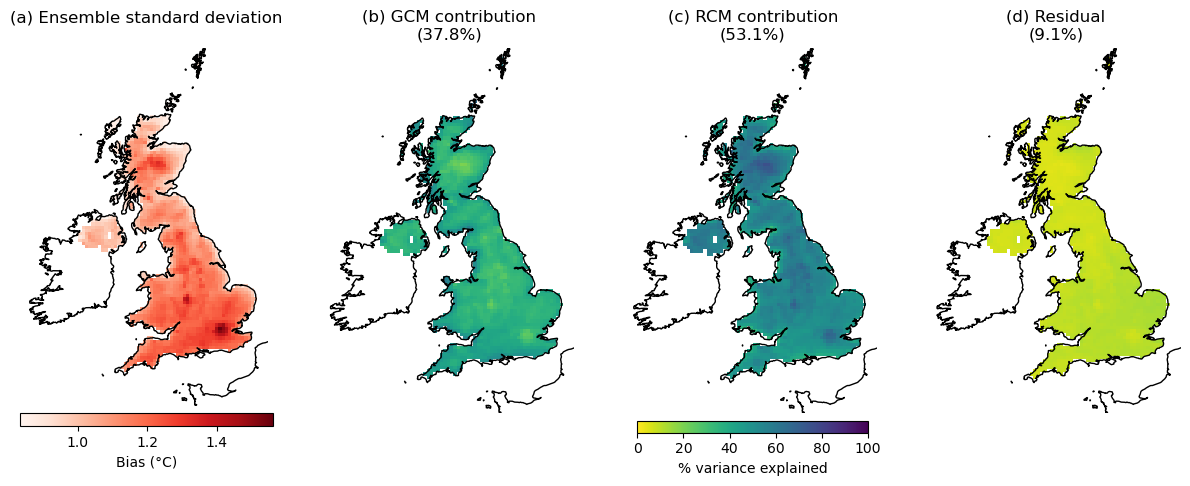

In [10]:
# create array of subplots using OSGB projection, adjust spacing
fig, axs = plt.subplots(ncols = 4, figsize = (15,5), sharex = True, sharey = True, dpi= 100, facecolor='w', edgecolor='k', subplot_kw = {"projection" : crs_osgb})
plt.subplots_adjust(hspace = 0)

# set spatial extent of map axes, remove bounding box, add coastlines
for ax in fig.axes:
    ax.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs = crs_osgb)                                                       # fix plot extent to reduce whitespace
    ax.set_axis_off()                                                                                              # remove box around plot
    ax.coastlines()                                                                                                # draw coastlines
    
cbar_ss = ens_sd.plot(ax = axs[0], cmap = "Reds", add_colorbar = False)
axs[0].set_title("(a) Ensemble standard deviation\n")
    
for i in range(3):
    cbar_ve = list(est_ve_maps.values())[i].plot(ax = axs[i+1], vmin = 0, vmax = 100, 
                                                 add_colorbar = False, cmap = "viridis_r")
    titlestring = ["(b) GCM contribution", "(c) RCM contribution", 
                   "(d) Residual"][i] + est_ve_string[i]
    axs[i+1].set_title(titlestring)

plt.colorbar(cbar_ss, ax = axs[0], location = "bottom", pad = 0.02, fraction = 0.05, label ="Bias (°C)")
plt.colorbar(cbar_ve, ax = axs[1:], location = "bottom", pad = 0.02, fraction = 0.03, label = "% variance explained")

#plt.suptitle("Figure 2: Estimated decomposition of variation in the EuroCORDEX ensemble", y = 1.03, fontweight = "bold")

# And save
plt.savefig("tasmax_eurocordex-anova_19890101-20081231_JJA.png")


<a id='plot-range-of-varexp'></a>
#### **Visualisation of ranges of variance explained** [^](#top)

In [11]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# additional: estimated variance explained by models 1a and 1b in the completed ensemble

ah_1a = alphahat_1a.stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values
bh_1b = betahat_1b.stack(s = ("projection_y_coordinate", "projection_x_coordinate")).dropna("s", "any").values

est_ve["Tc_Ga"] = R * np.trace(ah_1a.transpose() @ ah_1a) / np.trace(Tc) * 100
est_ve["Tc_Ra"] = 100 - est_ve["Tc_Ga"] - est_ve["Tc_E"]
est_ve["Tc_Rb"] = G * np.trace(bh_1b.transpose() @ bh_1b) / np.trace(Tc) * 100
est_ve["Tc_Gb"] = 100 - est_ve["Tc_Rb"] - est_ve["Tc_E"]

print("Range of variation explained by GCMs:" + str(round(est_ve["Tc_Gb"], 1)) + "% to " +
     str(round(est_ve["Tc_Ga"], 1)) + "%")
print("Range of variation explained by RCMs:" + str(round(est_ve["Tc_Ra"], 1)) + "% to " +
     str(round(est_ve["Tc_Rb"], 1)) + "%")

Range of variation explained by GCMs:28.8% to 56.4%
Range of variation explained by RCMs:34.5% to 62.1%


Text(0.5, 0.98, 'MANOVA in unbalanced ensemble')

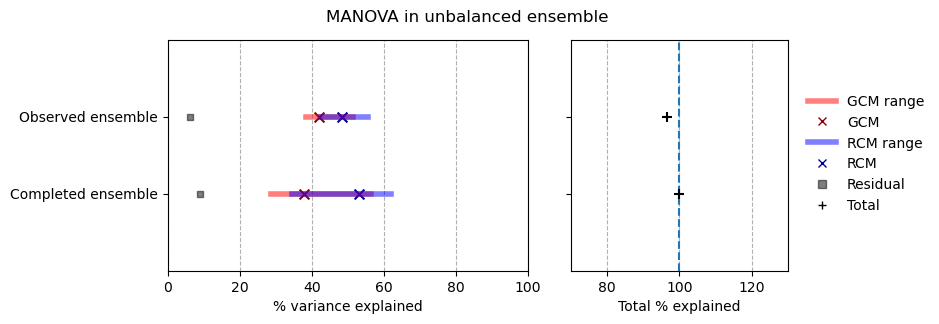

In [12]:
# plot of proportion of variance explained

fig, axs = plt.subplots(ncols = 2, figsize = (8,3), dpi = 100, facecolor = "w", sharey = True, gridspec_kw = {'width_ratios' : [1, 0.6]})
plt.subplots_adjust(wspace = 0.15)
axs[0].grid(axis = "x", ls = "--", zorder = -99); axs[1].grid(axis = "x", ls = "--")

#~~~~~~~~~~~~~~~~~~~~~~~~~~

axs[0].plot((obs_ve["T_Ga"], obs_ve["T_Gb"]), (0,0), lw = 4, color = "red", alpha = 0.5)
axs[0].plot((obs_ve["T_Ra"], obs_ve["T_Rb"]), (0,0), lw = 4, color = "blue", alpha = 0.5)
axs[0].scatter(obs_ve["T_G2"], 0, color = "darkred", marker = "x", s = 50)
axs[0].scatter(obs_ve["T_R2"], 0, color = "darkblue", marker = "x", s = 50)
axs[0].scatter(obs_ve["T_E"], 0, marker = "s", s = 20, color = "black", alpha = 0.5)
axs[0].scatter(est_ve["Tc_G2"], -1, color = "darkred", marker = "x", s = 50)
axs[0].scatter(est_ve["Tc_R2"], -1, color = "darkblue", marker = "x", s = 50)
axs[0].scatter(est_ve["Tc_E"], -1, marker = "s", s = 20, color = "black", alpha = 0.5)

axs[0].plot((est_ve["Tc_Ga"], est_ve["Tc_Gb"]), (-1,-1), lw = 4, color = "red", alpha = 0.5)
axs[0].plot((est_ve["Tc_Ra"], est_ve["Tc_Rb"]), (-1,-1), lw = 4, color = "blue", alpha = 0.5)

axs[0].set_ylim(-2,1); axs[0].set_yticks([0,-1]); axs[0].set_xlim(0,100)
axs[0].set_yticklabels(["Observed ensemble", "Completed ensemble"])

#~~~~~~~~~~~~~~~~~~~~~~~~~~

axs[1].scatter(sum([obs_ve[v] for v in ["T_G2", "T_R2", "T_E"]]), 0, 
               marker = "+", s = 50, color = "black")
axs[1].scatter(sum([est_ve[v] for v in ["Tc_G2", "Tc_R2", "Tc_E"]]), -1, 
               marker = "+", s = 50, color = "black", zorder = 99)
axs[1].plot((sum([obs_ve[v] for v in ["T_Ga", "T_Ra", "T_E"]]), 
             sum([obs_ve[v] for v in ["T_Gb", "T_Rb", "T_E"]])), 
            (0,0), lw = 4, color = "red", alpha = 0.5)

axs[1].set_xlim(70,130)
axs[1].axvline(100, ls = "--")

#~~~~~~~~~~~~~~~~~~~~~~~~~~
# add legend & axis labels

legend = {"GCM range" : matplotlib.lines.Line2D([], [], lw = 4, color = "red", alpha = 0.5),
          "GCM" : matplotlib.lines.Line2D([], [], color = "darkred", ls = "", marker = "x"),
          "RCM range" : matplotlib.lines.Line2D([], [], lw = 4, color = "blue", alpha = 0.5),
          "RCM" : matplotlib.lines.Line2D([], [], color = "darkblue", ls = "", marker = "x"),
          "Residual" : matplotlib.lines.Line2D([], [], color = "black", alpha = 0.5, ls = "", marker = "s"),
          "Total" : matplotlib.lines.Line2D([], [], color = "black", ls = "", marker = "+"),
         }
fig.legend(handles = legend.values(), labels = legend.keys(), edgecolor = "w", loc = 'center left', bbox_to_anchor = (0.91, 0.5))

axs[0].set_xlabel("% variance explained")
axs[1].set_xlabel("Total % explained")

fig.suptitle("MANOVA in unbalanced ensemble")

<a id="gcm-epps"></a>

#### **(v) Calculate EPPs of fitted GCM & RCM effects** [^](#top)



In [13]:
# compute EPPs from fitted effects
gcm_epps = EPPs(alpha_hat, Ybar)
rcm_epps = EPPs(beta_hat, Ybar)
residual_epps = EPPs(e_2, Ybar)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# specify plotting symbols & colours to reflect those used in the paper
gcm_markers = {'CNRM-CM5_r1i1p1': 'o', 'EC-EARTH_r12i1p1': 'p', 'EC-EARTH_r1i1p1': 'h', 'EC-EARTH_r3i1p1': 'H', 
               'IPSL-CM5A-MR_r1i1p1': 's', 'HadGEM2-ES_r1i1p1': 'P', 'MPI-ESM-LR_r1i1p1': '<', 
               'MPI-ESM-LR_r2i1p1': '^', 'MPI-ESM-LR_r3i1p1': '>', 'NorESM1-M_r1i1p1': 'X'}

rcm_colours = {'ALADIN63': 'mediumblue', 'CCLM4-8-17': 'blueviolet', 'COSMO-crCLIM-v1-1': 'mediumvioletred', 'HIRHAM5': 'red', 'HadREM3-GA7-05': 'darkorange', 'RACMO22E': 'gold',
               'RCA4': 'yellowgreen', 'REMO2015': 'green', 'RegCM4-6': 'darkturquoise', 'WRF381P': 'dodgerblue'}

# get maximum values to fix colour scale & score axes for both GCMs and RCMs
vmax = max([np.abs(epps["EPPs"].max()) for epps in [gcm_epps, rcm_epps, residual_epps]] + [np.abs(epps["EPPs"].min()) for epps in [gcm_epps, rcm_epps, residual_epps]])
smax = max([np.abs(epps["scores"].max()) for epps in [gcm_epps, rcm_epps, residual_epps]] + [np.abs(epps["scores"].min()) for epps in [gcm_epps, rcm_epps, residual_epps]]) * 1.2

<a id="figure-3&4"></a>
##### **Figures 3 & 4: EPP1 and EPP2 for GCMs and RCMs in the EuroCORDEX ensemble**

Text(0.5, 1.1, 'Figure 4: EPPs of fitted RCM effects')

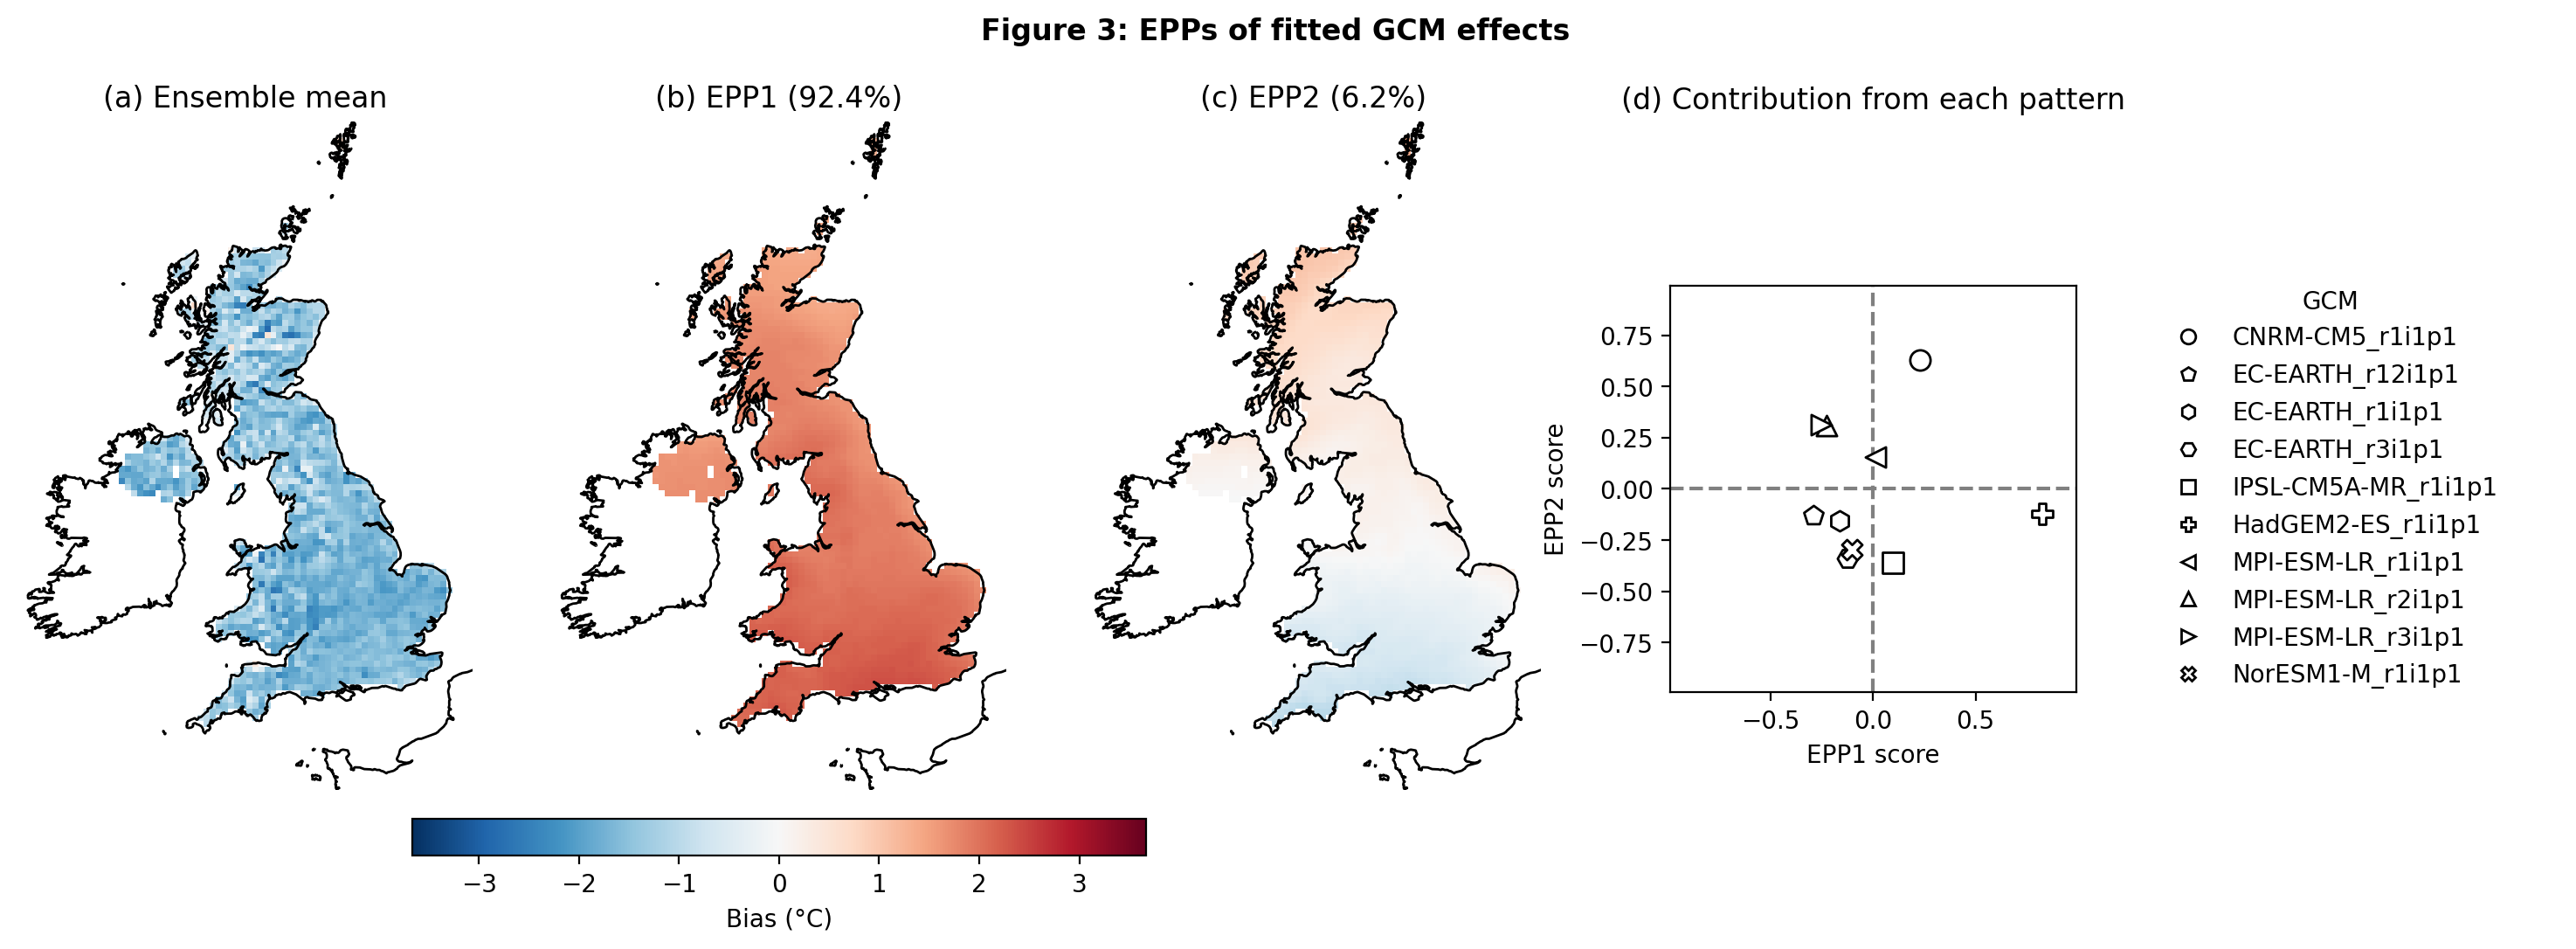

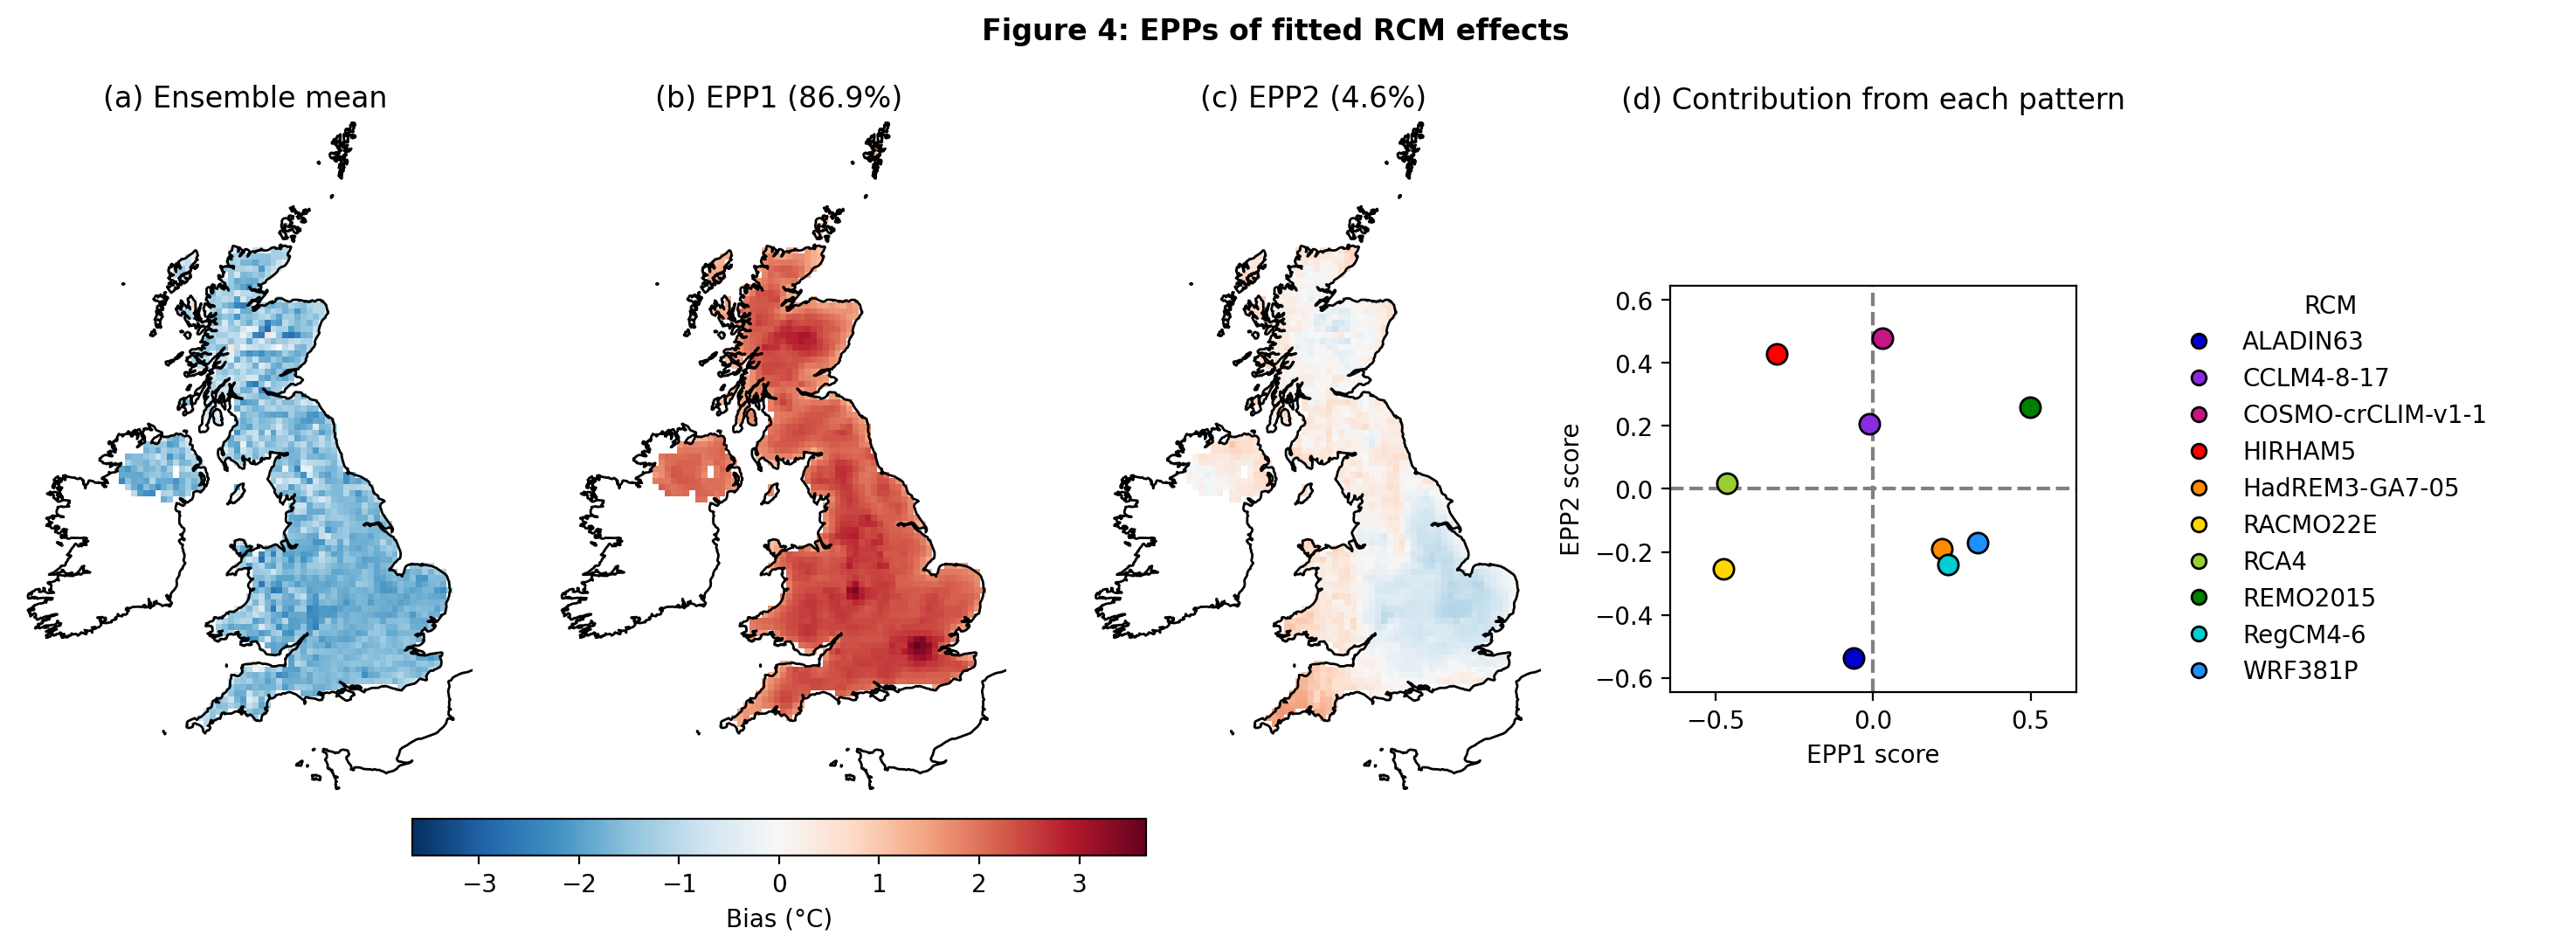

In [14]:
# plot GCM EPPs

# REC python newbie note: in next line, *gc_epps.values() unpacks the components 
# of the gcm_epps.values() object which are "EPPs", "scores" and "var_explained"

EPP_plot(*gcm_epps.values(), cmap = "RdBu_r", markers = [gcm_markers[g] for g in ShortGCMNames], 
         colours = "w", cbar_label = "Bias (°C)", vlim = vmax, LegInfo=gcm_markers)
#plt.gca().set_xlim(-smax, smax); plt.gca().set_ylim(-smax, smax)

plt.savefig("tasmax_12km_epp-gcm_19890101-20081231_JJA.png", bbox_inches="tight",# Without title, for inclusion in paper
            pad_inches=0.3)
plt.suptitle("Figure 3: EPPs of fitted GCM effects", y = 1.1, fontweight = "bold")

# plot RCM EPPs
EPP_plot(*rcm_epps.values(), cmap = "RdBu_r", colours = [rcm_colours[r] for r in rcms],
         cbar_label = "Bias (°C)", vlim = vmax, LegInfo=rcm_colours)
#plt.gca().set_xlim(-smax, smax); plt.gca().set_ylim(-smax, smax)
plt.savefig("tasmax_12km_epp-rcm_19890101-20081231_JJA.png", bbox_inches="tight", pad_inches=0.3)
plt.suptitle("Figure 4: EPPs of fitted RCM effects", y = 1.1, fontweight = "bold")

##### **For illustration: residual EPP1 and EPP2 for the EuroCORDEX ensemble**

Text(0.5, 1.1, 'EPPs of residuals')

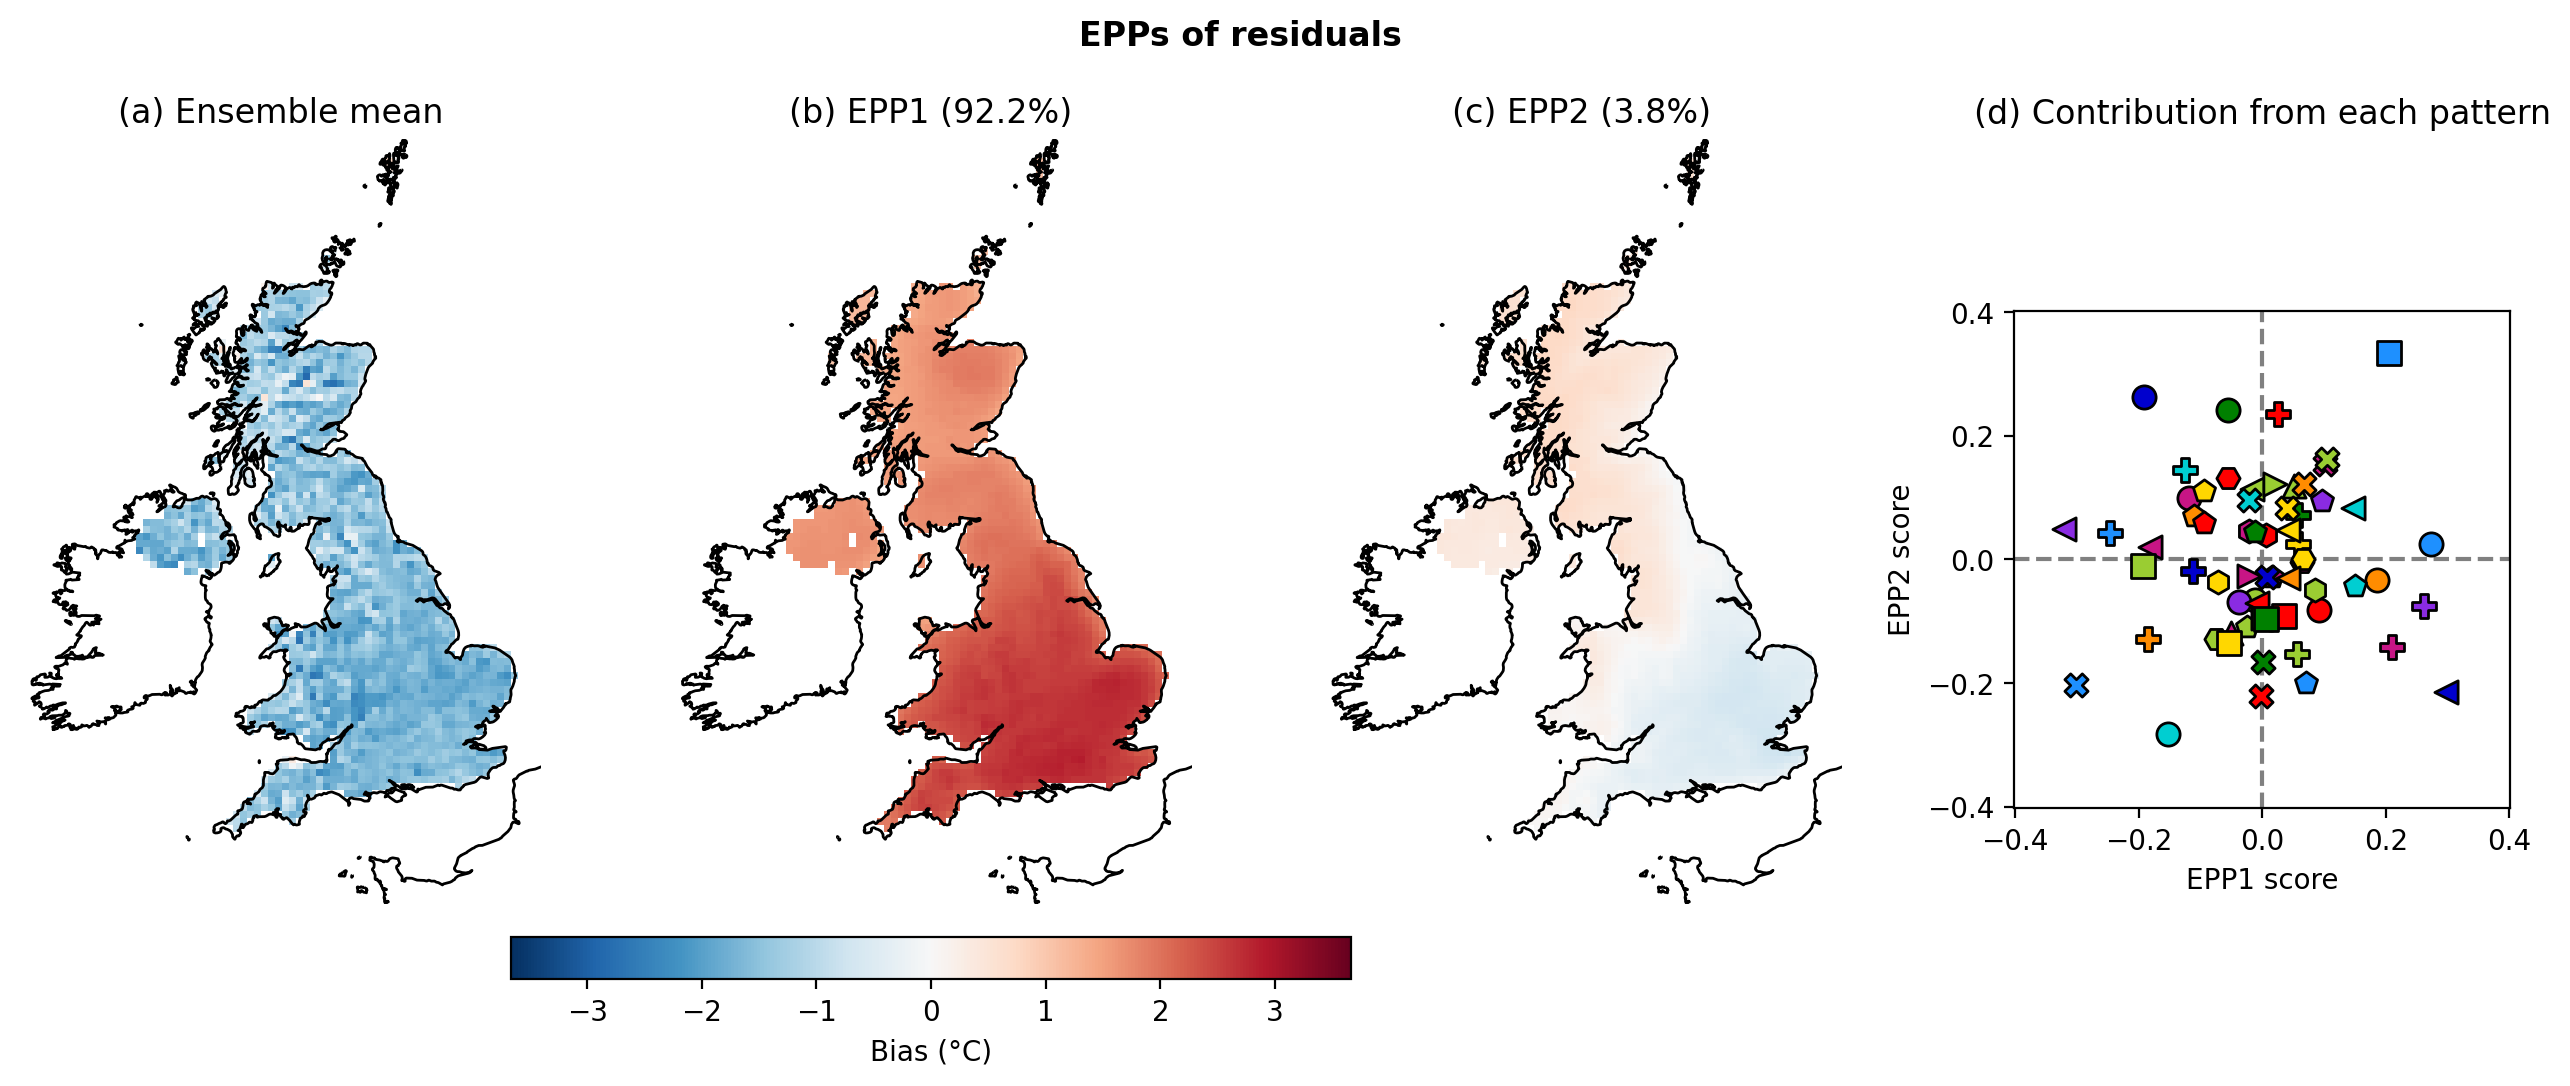

In [15]:
# plot residual EPPs
EPP_plot(*residual_epps.values(), cmap = "RdBu_r", cbar_label = "Bias (°C)", vlim = vmax,
        markers = [gcm_markers[re.sub("p1_.+", "p1", g)] for g in ShortRunNames],
        colours = [rcm_colours[re.sub(".+p1_", "", r)] for r in ShortRunNames])
#plt.gca().set_xlim(-smax, smax); plt.gca().set_ylim(-smax, smax)
plt.suptitle("EPPs of residuals", y = 1.1, fontweight = "bold")

**_Comments on residual EPPs:_**
    
* Recall from Figure 2 that residuals account for just 9% of the total ensemble variation
* Ensemble mean residual is patchy: little obvious structure
* EPP1 is a smooth north-south gradient accounting for 92% of the residual variation
* EPPs is also smooth: little of interest here
* Scores on the two EPPs form a dense cloud: little to flag any individual ensemble members as having any unusual features. 

##### **Another illustration: GCM and RCM EPP3 and EPP4 for EuroCORDEX**

Text(0.5, 1.1, 'EPPs 3 and 4 for fitted RCM effects')

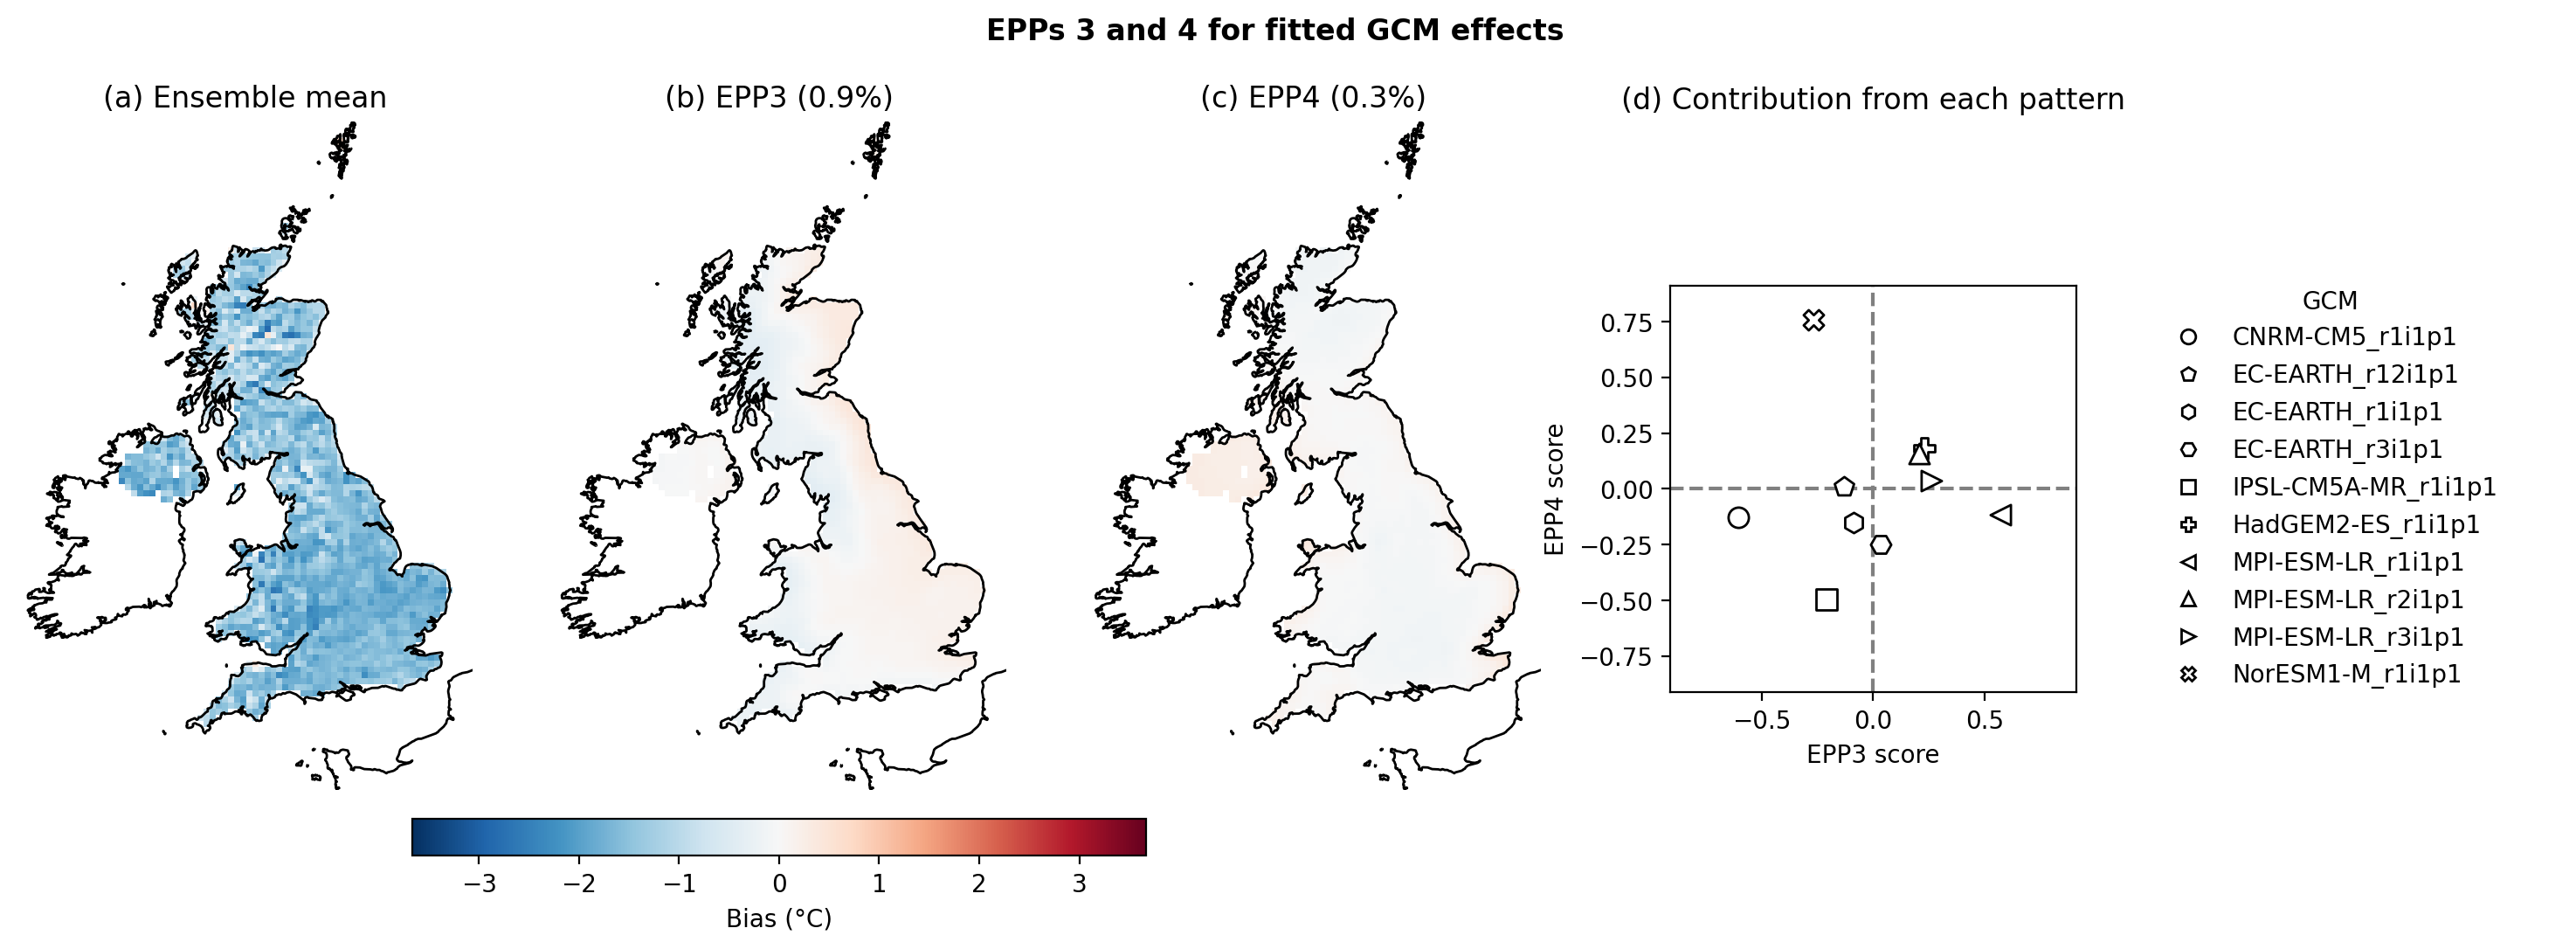

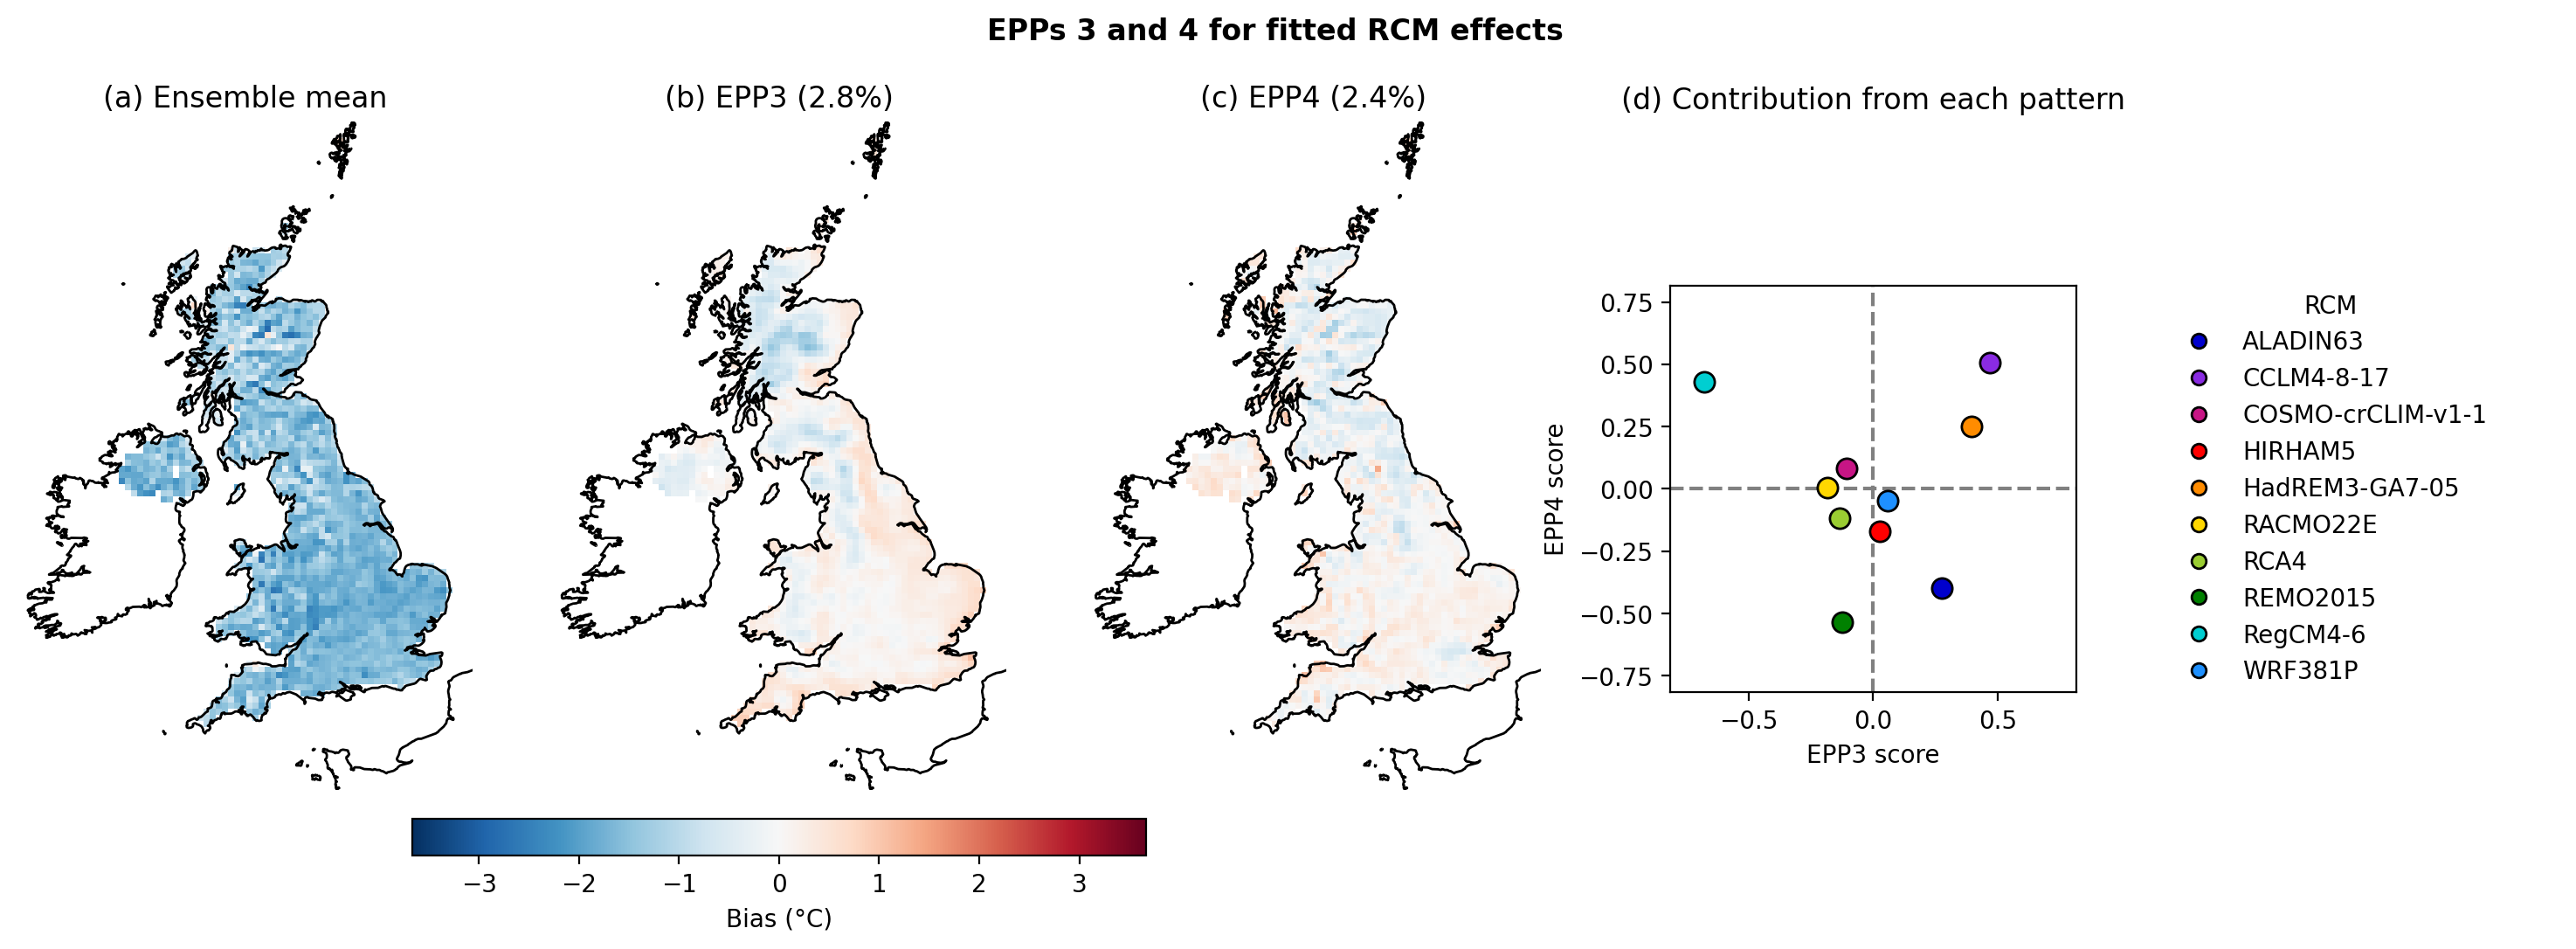

In [16]:
# plot GCM EPPs

EPP_plot(*gcm_epps.values(), which=[3,4], cmap = "RdBu_r", markers = list(gcm_markers.values()), 
         colours = "w", cbar_label = "Bias (°C)", vlim = vmax, LegInfo=gcm_markers)
#plt.gca().set_xlim(-smax, smax); plt.gca().set_ylim(-smax, smax)
plt.suptitle("EPPs 3 and 4 for fitted GCM effects", y = 1.1, fontweight = "bold")

# plot RCM EPPs
EPP_plot(*rcm_epps.values(), which=[3, 4], cmap = "RdBu_r", colours = list(rcm_colours.values()), 
         cbar_label = "Bias (°C)", vlim = vmax, LegInfo=rcm_colours)
#plt.gca().set_xlim(-smax, smax); plt.gca().set_ylim(-smax, smax)
plt.suptitle("EPPs 3 and 4 for fitted RCM effects", y = 1.1, fontweight = "bold")